# Projet 4 - Segmentation des clients d'un site e-commerce

Ce notebook contient les essais de segmentation des clients basés sur le dataset nettoyé dans l'analyse exploratoire.

## Table des matières
1. [Importation et préparation des données](#1-importation-et-préparation-des-données)
2. [Normalisation des données](#2-normalisation-des-données)
3. [Méthode KMeans](#3-méthode-kmeans)
   - 3.1 [Détermination du nombre optimal de clusters](#31-détermination-du-nombre-optimal-de-clusters)
   - 3.2 [Application de KMeans](#32-application-de-kmeans)
   - 3.3 [Visualisation des clusters](#33-visualisation-des-clusters)
   - 3.4 [Analyse des clusters](#34-analyse-des-clusters)
4. [Méthode DBSCAN](#4-méthode-dbscan) 
5. [Analyse RFM](#5-analyse-rfm)
6. [Sauvegarde des modèles](#6-sauvegarde-des-modèles)
7. [Conclusion](#7-conclusion)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import joblib
from datetime import datetime
from MLUtils import DataAnalysis, DataEngineering

# Pour une meilleure lisibilité des graphiques
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14

# Configuration de seaborn pour une meilleure esthétique
sns.set_theme(style="whitegrid")

# Ignorer les warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 1. Importation et préparation des données
print("1. Importation et préparation des données")

# Importation du jeu de données nettoyé
df = pd.read_csv('data/clean.csv')
print(f"Le dataset contient {df.shape[0]} observations et {df.shape[1]} variables.")

# Aperçu des données
print("\nAperçu des données:")
display(df.head())

# Information sur les colonnes
print("\nInformation sur les colonnes:")
df.info()

1. Importation et préparation des données
Le dataset contient 72313 observations et 15 variables.

Aperçu des données:


,customer_unique_id,avg_delivery_time_days,days_since_last_order,avg_review_score,avg_delivery_delay_days,max_delivery_delay_days,has_comment,last_payment_type,last_payment_installments,avg_spent_per_order,avg_days_between_orders,loyalty_score,is_credit_card,recency_score,frequency_score
0,0000366f3b9a7992bf8c76cfdf3221e2,6.411227,160.315174,5.0,0.0,0.0,1,credit_card,8.0,141.90,160.315174,0.879644,1,0.236253,0.006199
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.285590,163.304757,4.0,0.0,0.0,0,credit_card,1.0,27.19,163.304757,0.165485,1,0.246802,0.006086
2,0000f46a3911fa3c0805444483337064,25.731759,585.892535,3.0,0.0,0.0,0,credit_card,8.0,86.22,585.892535,0.146909,1,0.963514,0.001704
3,0000f6ccb0745a6a4b88665a16c9f078,20.037083,369.917095,4.0,0.0,0.0,1,credit_card,4.0,43.62,369.917095,0.117600,1,0.708193,0.002696
4,0004aac84e0df4da2b147fca70cf8255,13.141134,336.947639,5.0,0.0,0.0,0,credit_card,6.0,196.89,336.947639,0.582605,1,0.657780,0.002959



Information sur les colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72313 entries, 0 to 72312
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_unique_id         72313 non-null  object 
 1   avg_delivery_time_days     72313 non-null  float64
 2   days_since_last_order      72313 non-null  float64
 3   avg_review_score           72313 non-null  float64
 4   avg_delivery_delay_days    72313 non-null  float64
 5   max_delivery_delay_days    72313 non-null  float64
 6   has_comment                72313 non-null  int64  
 7   last_payment_type          72313 non-null  object 
 8   last_payment_installments  72313 non-null  float64
 9   avg_spent_per_order        72313 non-null  float64
 10  avg_days_between_orders    72313 non-null  float64
 11  loyalty_score              72313 non-null  float64
 12  is_credit_card             72313 non-null  int64  
 13  recency_score  

In [3]:
# Statistiques descriptives
print("Statistiques descriptives des variables numériques:")
display(df.describe())

Statistiques descriptives des variables numériques:


,avg_delivery_time_days,days_since_last_order,avg_review_score,avg_delivery_delay_days,max_delivery_delay_days,has_comment,last_payment_installments,avg_spent_per_order,avg_days_between_orders,loyalty_score,is_credit_card,recency_score,frequency_score
count,72313.000000,72313.000000,72313.000000,72313.000000,72313.000000,72313.000000,72313.000000,72313.000000,72313.000000,72313.000000,72313.000000,72313.000000,72313.000000
mean,11.054594,300.868107,4.263901,0.145532,0.150778,0.391036,2.272330,102.048720,300.718000,0.431258,0.754927,0.525004,0.004583
std,6.083538,148.914138,1.169092,0.914278,0.959584,0.487986,1.840528,62.464611,148.899320,0.320203,0.430134,0.278122,0.003169
min,0.781366,49.151597,1.000000,0.000000,0.000000,0.000000,0.000000,9.590000,44.921296,0.023585,0.000000,0.000031,0.001342
25%,6.468565,180.353877,4.000000,0.000000,0.000000,0.000000,1.000000,54.370000,180.291806,0.183877,1.000000,0.287964,0.002438
50%,9.940336,281.395313,5.000000,0.000000,0.000000,0.000000,1.000000,85.490000,281.280394,0.332497,1.000000,0.529842,0.003543
75%,14.576898,409.384178,5.000000,0.000000,0.000000,1.000000,3.000000,136.500000,409.219225,0.594304,1.000000,0.765858,0.005516
max,29.030833,744.364907,5.000000,20.518345,29.912824,1.000000,8.000000,323.960000,744.364907,1.457193,1.000000,0.999959,0.021776


In [4]:
# 2. Normalisation des données
print("2. Normalisation des données")

# Conversion de la colonne catégorielle 'last_payment_type' en variable binaire
df['last_payment_type_credit'] = df['last_payment_type'].apply(lambda x: 1 if x == 'credit_card' else 0)

# Sélection des colonnes à normaliser
columns_to_normalize = [
    'avg_delivery_time_days', 
    'days_since_last_order', 
    'avg_review_score',
    'avg_delivery_delay_days', 
    'max_delivery_delay_days', 
    'has_comment',
    'last_payment_installments', 
    'avg_spent_per_order',
    'avg_days_between_orders', 
    'loyalty_score',
    'last_payment_type_credit'
]

# Initialisation du StandardScaler
scaler = StandardScaler()

# Normalisation des colonnes sélectionnées
for col in columns_to_normalize:
    df[f'{col}_normalized'] = scaler.fit_transform(df[[col]])

print(f"Normalisation effectuée pour {len(columns_to_normalize)} colonnes.")
print("\nAperçu des colonnes normalisées:")
normalized_cols = [col + '_normalized' for col in columns_to_normalize]
display(df[normalized_cols].head())

2. Normalisation des données
Normalisation effectuée pour 11 colonnes.

Aperçu des colonnes normalisées:


,avg_delivery_time_days_normalized,days_since_last_order_normalized,avg_review_score_normalized,avg_delivery_delay_days_normalized,max_delivery_delay_days_normalized,has_comment_normalized,last_payment_installments_normalized,avg_spent_per_order_normalized,avg_days_between_orders_normalized,loyalty_score_normalized,last_payment_type_credit_normalized
0,-0.763273,-0.943859,0.629637,-0.159179,-0.15713,1.247921,3.111993,0.637986,-0.942945,1.400327,0.569765
1,-1.277062,-0.923783,-0.225733,-0.159179,-0.15713,-0.801332,-0.691290,-1.198426,-0.922866,-0.830019,0.569765
2,2.412620,1.914032,-1.081103,-0.159179,-0.15713,-0.801332,3.111993,-0.253405,1.915230,-0.888032,0.569765
3,1.476534,0.463686,-0.225733,-0.159179,-0.15713,1.247921,0.938688,-0.935396,0.464741,-0.979565,0.569765
4,0.342984,0.242286,0.629637,-0.159179,-0.15713,-0.801332,2.025341,1.518331,0.243318,0.472662,0.569765


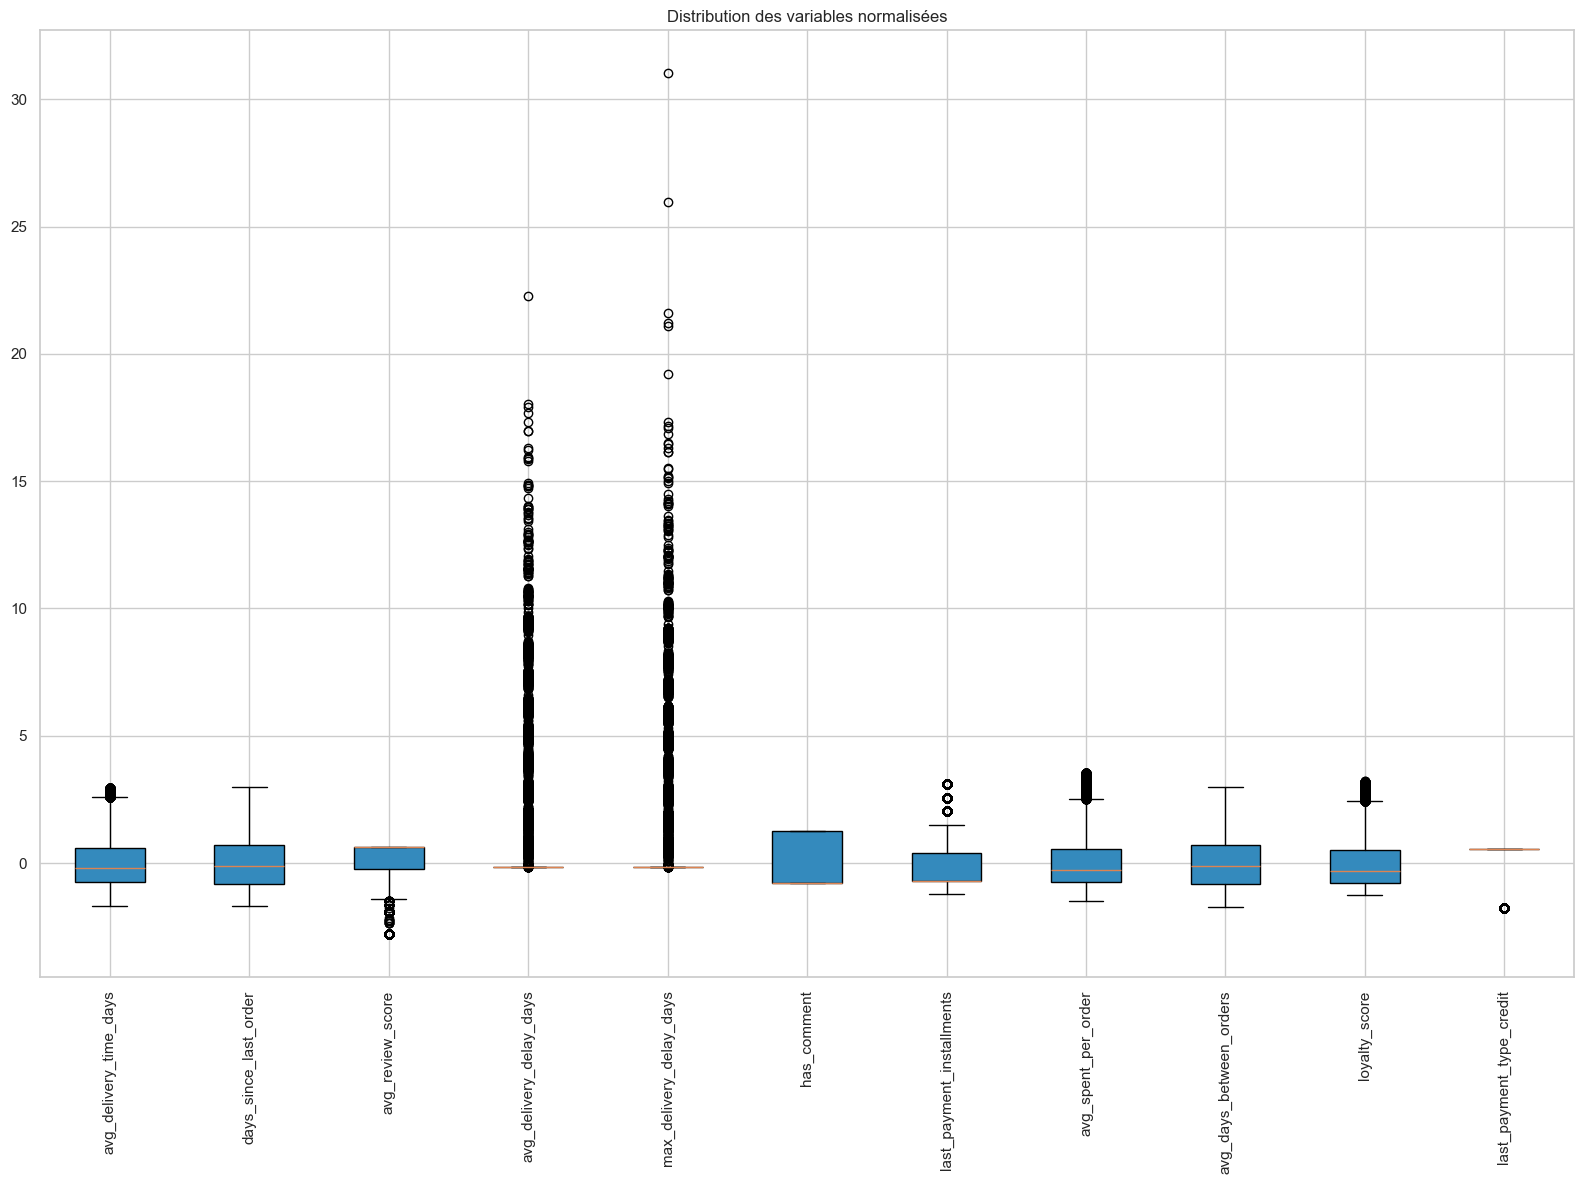

In [5]:
# Visualisation de la distribution des variables normalisées avec des boîtes à moustaches
plt.figure(figsize=(16, 12))
plt.boxplot(df[normalized_cols], vert=True, patch_artist=True, labels=[col.replace('_normalized', '') for col in normalized_cols])
plt.xticks(rotation=90)
plt.title('Distribution des variables normalisées')
plt.tight_layout()
plt.show()

In [6]:
# 3. Méthode KMeans
print("3. Méthode KMeans")

# Sélection des colonnes normalisées pour le clustering
features = df[normalized_cols]

3. Méthode KMeans


Application de la méthode du coude...


  File "c:\Users\jeanc\.conda\envs\oc-p4\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\jeanc\.conda\envs\oc-p4\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jeanc\.conda\envs\oc-p4\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\jeanc\.conda\envs\oc-p4\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


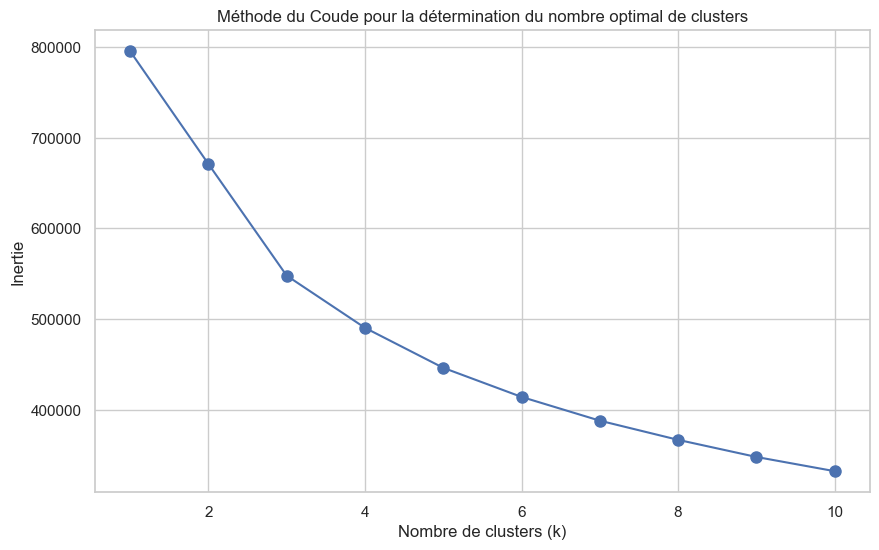

In [7]:
# 3.1 Détermination du nombre optimal de clusters

# Application de la méthode du coude pour trouver le nombre optimal de clusters
print("Application de la méthode du coude...")
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Visualisation de la courbe d'inertie
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.title('Méthode du Coude pour la détermination du nombre optimal de clusters')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.grid(True)
plt.show()

In [8]:
# Analyse quantitative du coude - Calcul des pentes entre points consécutifs
slopes = []
for i in range(1, len(inertia)):
    slope = (inertia[i] - inertia[i-1]) / (k_range[i] - k_range[i-1])
    slopes.append(slope)
    print(f"Pente entre k={k_range[i-1]} et k={k_range[i]}: {slope:.2f}")

# Calcul des différences de pentes (dérivée seconde)
slope_changes = []
for i in range(1, len(slopes)):
    change = abs(slopes[i] - slopes[i-1])
    slope_changes.append(change)
    print(f"Changement de pente entre k={k_range[i]} et k={k_range[i+1]}: {change:.2f}")

# Détermination du coude (où le changement de pente est maximum)
optimal_k_idx = slope_changes.index(max(slope_changes)) + 1
optimal_k = k_range[optimal_k_idx + 1]

print(f"\nLe nombre optimal de clusters suggéré par l'analyse est: {optimal_k}")

Pente entre k=1 et k=2: -124291.59
Pente entre k=2 et k=3: -123109.95
Pente entre k=3 et k=4: -57520.34
Pente entre k=4 et k=5: -44090.06
Pente entre k=5 et k=6: -32068.43
Pente entre k=6 et k=7: -26187.42
Pente entre k=7 et k=8: -21138.88
Pente entre k=8 et k=9: -18860.51
Pente entre k=9 et k=10: -15666.00
Changement de pente entre k=2 et k=3: 1181.64
Changement de pente entre k=3 et k=4: 65589.62
Changement de pente entre k=4 et k=5: 13430.27
Changement de pente entre k=5 et k=6: 12021.64
Changement de pente entre k=6 et k=7: 5881.00
Changement de pente entre k=7 et k=8: 5048.54
Changement de pente entre k=8 et k=9: 2278.37
Changement de pente entre k=9 et k=10: 3194.51

Le nombre optimal de clusters suggéré par l'analyse est: 4


In [9]:
# 3.2 Application de KMeans avec le nombre optimal de clusters

# Définition du nombre de clusters
n_clusters = optimal_k
print(f"Application de KMeans avec {n_clusters} clusters...")

# Initialisation et entraînement du modèle KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(features)

# Ajouter les étiquettes de cluster au DataFrame
df['cluster'] = cluster_labels

# Afficher la taille de chaque cluster
cluster_sizes = df['cluster'].value_counts().sort_index()
print("\nTaille de chaque cluster:")
for cluster_id, size in cluster_sizes.items():
    print(f"Cluster {cluster_id}: {size} clients ({size/len(df)*100:.2f}%)")

# Création d'un résumé des centres de clusters
centers = pd.DataFrame(kmeans.cluster_centers_, columns=normalized_cols)
centers.index.name = 'Cluster'

print("\nCentres des clusters (données normalisées):")
display(centers)

Application de KMeans avec 4 clusters...

Taille de chaque cluster:
Cluster 0: 28250 clients (39.07%)
Cluster 1: 25163 clients (34.80%)
Cluster 2: 1373 clients (1.90%)
Cluster 3: 17527 clients (24.24%)

Centres des clusters (données normalisées):


,avg_delivery_time_days_normalized,days_since_last_order_normalized,avg_review_score_normalized,avg_delivery_delay_days_normalized,max_delivery_delay_days_normalized,has_comment_normalized,last_payment_installments_normalized,avg_spent_per_order_normalized,avg_days_between_orders_normalized,loyalty_score_normalized,last_payment_type_credit_normalized
Cluster,,,,,,,,,,,
0,-0.145461,-0.576487,0.093500,-0.119178,-0.118161,-0.098536,-0.425100,-0.578964,-0.576407,-0.256747,-0.175696
1,0.008263,1.113721,0.019769,-0.136738,-0.135324,0.046733,0.132781,-0.024660,1.113873,-0.658400,0.026624
2,2.001555,-0.322933,-1.743652,6.435016,6.377291,0.397794,-0.067296,0.001219,-0.326671,0.169369,-0.076597
3,0.065677,-0.646759,-0.042424,-0.116041,-0.115186,0.060501,0.499962,0.969223,-0.646814,1.347862,0.251107


Réduction de dimensionnalité avec PCA pour la visualisation...

Variance expliquée par chaque composante principale:
PC1: 22.87%
PC2: 20.63%
PC3: 15.38%
Variance totale expliquée par les 3 premières composantes: 58.88%


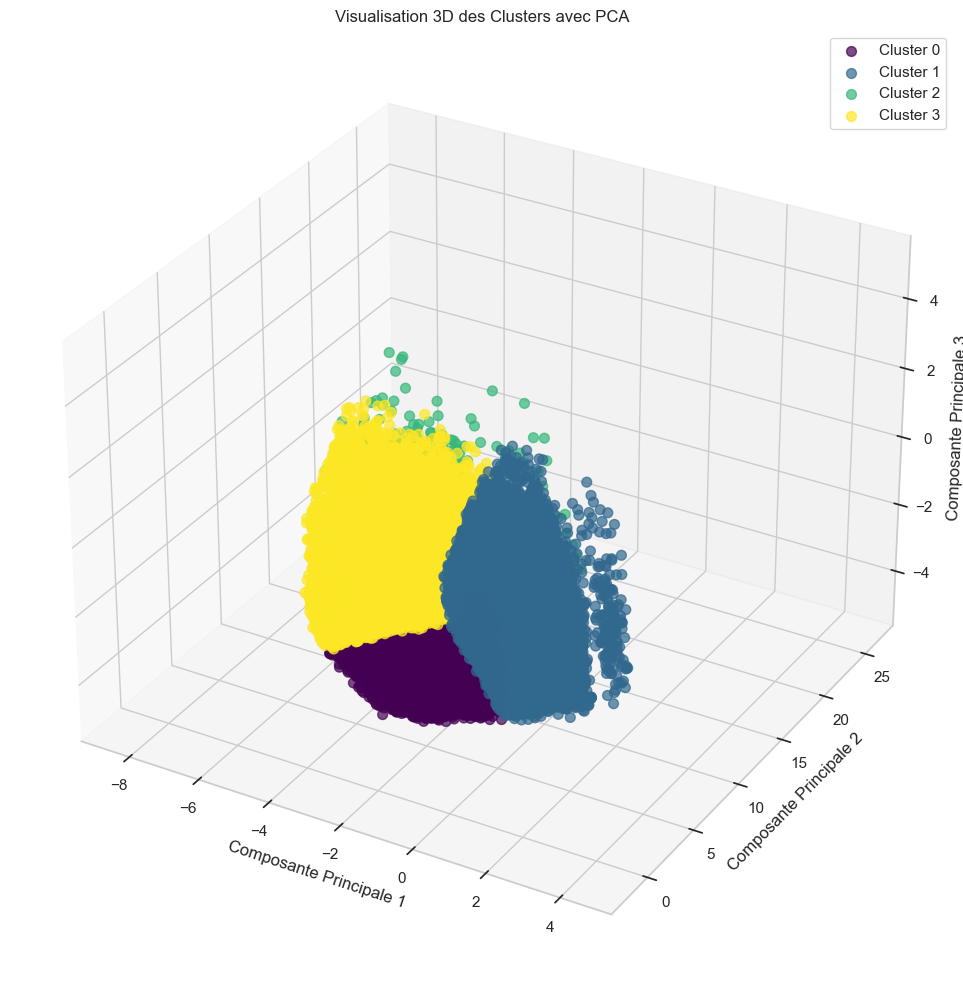

In [10]:
# 3.3 Visualisation des clusters avec PCA

# Réduction de dimensionnalité avec PCA pour la visualisation
print("Réduction de dimensionnalité avec PCA pour la visualisation...")
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features)

# Ajout des composantes principales au DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]
df['pca3'] = pca_result[:, 2]

# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_
print("\nVariance expliquée par chaque composante principale:")
for i, ratio in enumerate(explained_variance):
    print(f"PC{i+1}: {ratio:.2%}")
print(f"Variance totale expliquée par les 3 premières composantes: {sum(explained_variance):.2%}")

# Visualisation 3D des clusters
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Création d'une palette de couleurs pour chaque cluster
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters))

for cluster_id, color in zip(range(n_clusters), colors):
    cluster_data = df[df['cluster'] == cluster_id]
    ax.scatter(
        cluster_data['pca1'], 
        cluster_data['pca2'], 
        cluster_data['pca3'],
        color=color,
        label=f'Cluster {cluster_id}',
        alpha=0.7,
        s=50
    )

ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_zlabel('Composante Principale 3')
ax.set_title('Visualisation 3D des Clusters avec PCA')
plt.legend()
plt.tight_layout()
plt.show()

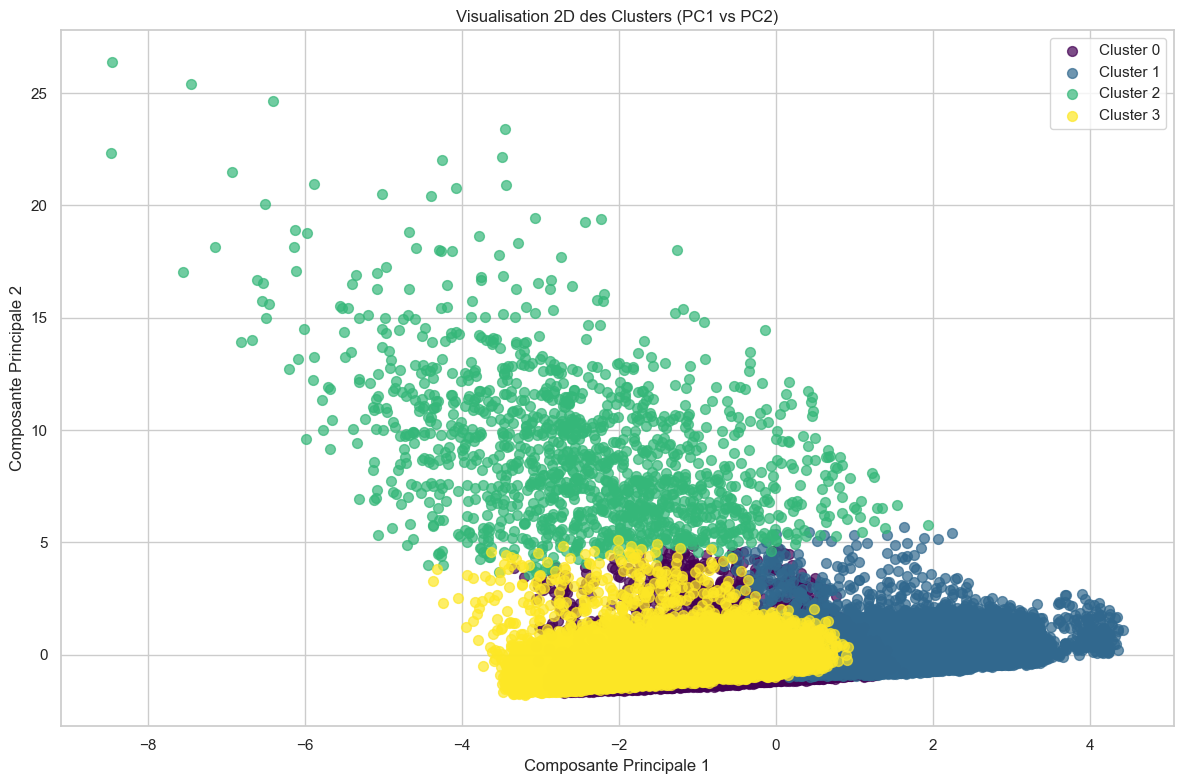

In [11]:
# Visualisation 2D des clusters - PC1 vs PC2
plt.figure(figsize=(12, 8))
for cluster_id, color in zip(range(n_clusters), colors):
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(
        cluster_data['pca1'], 
        cluster_data['pca2'],
        color=color,
        label=f'Cluster {cluster_id}',
        alpha=0.7,
        s=50
    )
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Visualisation 2D des Clusters (PC1 vs PC2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

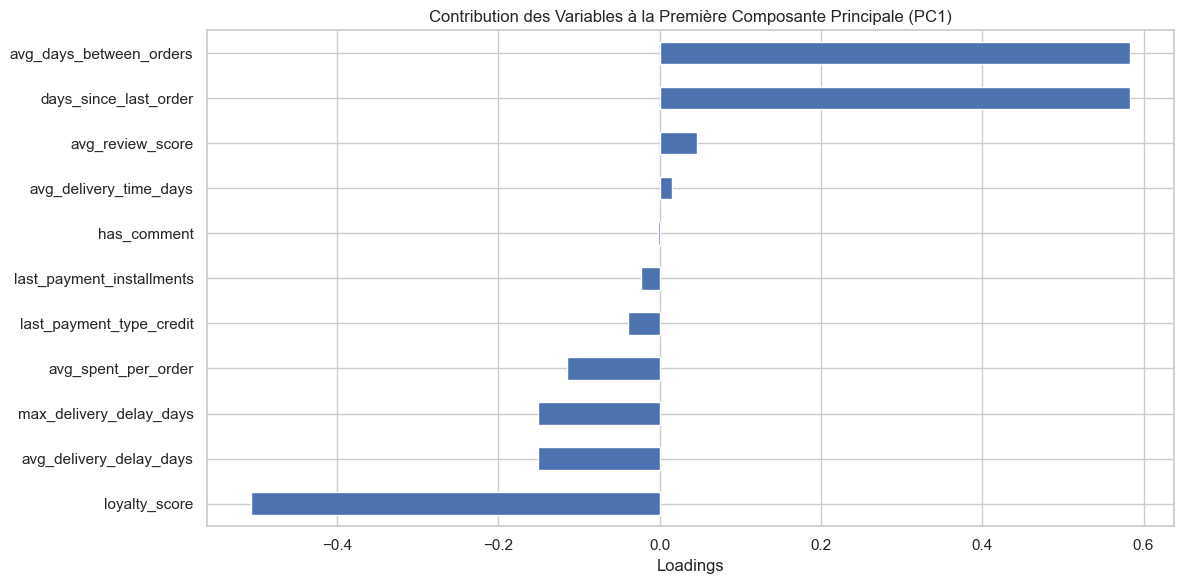

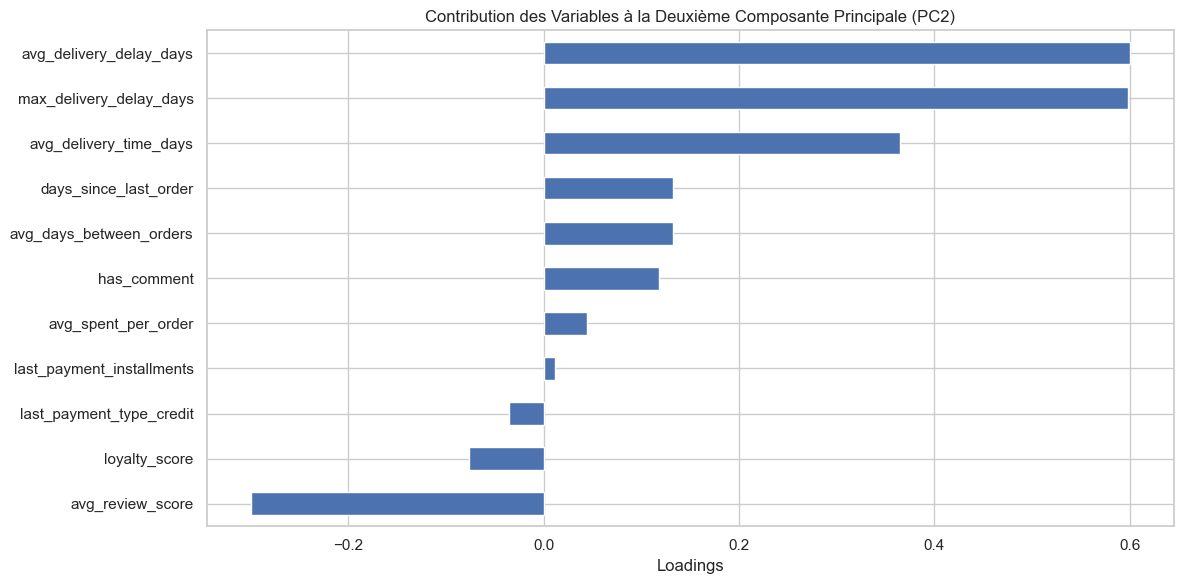

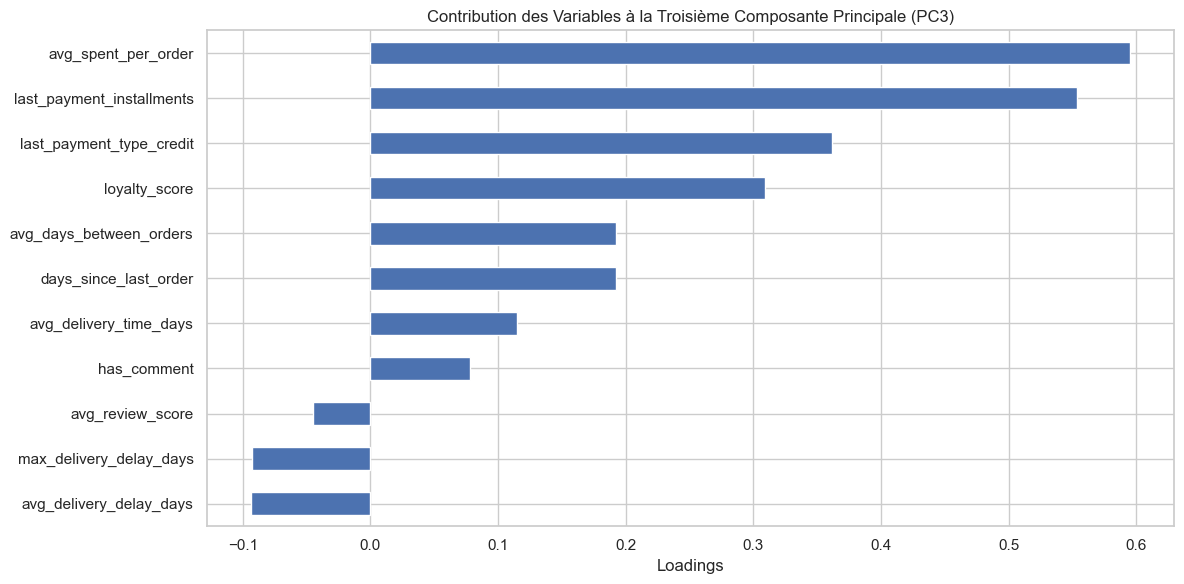

In [12]:
# Analyse des contributions des variables aux composantes principales
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=['PC1', 'PC2', 'PC3'], 
    index=[col.replace('_normalized', '') for col in normalized_cols]
)

# Visualisation des contributions à la PC1
plt.figure(figsize=(12, 6))
loadings['PC1'].sort_values().plot(kind='barh')
plt.title('Contribution des Variables à la Première Composante Principale (PC1)')
plt.xlabel('Loadings')
plt.tight_layout()
plt.show()

# Visualisation des contributions à la PC2
plt.figure(figsize=(12, 6))
loadings['PC2'].sort_values().plot(kind='barh')
plt.title('Contribution des Variables à la Deuxième Composante Principale (PC2)')
plt.xlabel('Loadings')
plt.tight_layout()
plt.show()

# Visualisation des contributions à la PC3
plt.figure(figsize=(12, 6))
loadings['PC3'].sort_values().plot(kind='barh')
plt.title('Contribution des Variables à la Troisième Composante Principale (PC3)')
plt.xlabel('Loadings')
plt.tight_layout()
plt.show()

In [13]:
# 3.4 Analyse des clusters

# Fonction pour définir des noms explicites aux clusters
def define_cluster_names(centers):
    """
    Définit des noms de clusters basés sur les caractéristiques des centroides.
    """
    cluster_names = {}
    
    for cluster_id in range(len(centers)):
        centroid = centers.iloc[cluster_id]
        
        # Analyse des caractéristiques dominantes
        loyalty = centroid['loyalty_score_normalized']
        recency = centroid['days_since_last_order_normalized']
        review = centroid['avg_review_score_normalized']
        spending = centroid['avg_spent_per_order_normalized']
        frequency = -centroid['avg_days_between_orders_normalized']  # Inversé car une valeur faible signifie une fréquence élevée
        
        # Définition du nom basé sur les caractéristiques
        if loyalty > 0.5 and spending > 0.3:
            name = "Clients Fidèles à Haute Valeur"
        elif loyalty > 0 and recency < 0:
            name = "Clients Actifs Réguliers"
        elif review > 0.5 and recency < 0:
            name = "Clients Satisfaits Récents"
        elif recency > 0.5:
            name = "Clients Inactifs"
        elif review < -0.5:
            name = "Clients Insatisfaits"
        elif spending > 0.5:
            name = "Acheteurs Occasionnels à Fort Panier"
        elif frequency > 0.3:
            name = "Acheteurs Fréquents"
        else:
            name = f"Cluster {cluster_id}"
            
        cluster_names[cluster_id] = name
    
    return cluster_names

# Définir les noms des clusters
cluster_names = define_cluster_names(centers)

# Ajouter les noms des clusters au DataFrame
df['cluster_name'] = df['cluster'].map(cluster_names)

# Afficher les noms des clusters
print("Noms des clusters:")
for cluster_id, name in cluster_names.items():
    print(f"Cluster {cluster_id}: {name}")

# Statistiques moyennes par cluster sur les variables numériques originales
numeric_original_columns = [col for col in df.columns if col not in normalized_cols + ['cluster', 'cluster_name', 'pca1', 'pca2', 'pca3', 'last_payment_type_credit', 'customer_unique_id', 'last_payment_type']]
cluster_stats = df.groupby('cluster')[numeric_original_columns].mean()

# Ajouter les noms des clusters aux statistiques
cluster_stats['cluster_name'] = [cluster_names[i] for i in cluster_stats.index]

# Afficher les statistiques par cluster
print("\nStatistiques moyennes par cluster:")
display(cluster_stats)

Noms des clusters:
Cluster 0: Acheteurs Fréquents
Cluster 1: Clients Inactifs
Cluster 2: Clients Actifs Réguliers
Cluster 3: Clients Fidèles à Haute Valeur

Statistiques moyennes par cluster:


,avg_delivery_time_days,days_since_last_order,avg_review_score,avg_delivery_delay_days,max_delivery_delay_days,has_comment,last_payment_installments,avg_spent_per_order,avg_days_between_orders,loyalty_score,is_credit_card,recency_score,frequency_score,cluster_name
cluster,,,,,,,,,,,,,,
0,10.177645,215.279648,4.372587,0.036664,0.037486,0.343080,1.491115,65.865055,215.150172,0.348363,0.679398,0.371222,0.005676,Acheteurs Fréquents
1,11.104035,466.843078,4.286679,0.020535,0.020943,0.413981,2.518897,100.566638,466.698911,0.220520,0.766602,0.828327,0.002214,Clients Inactifs
2,23.236758,252.810124,2.226317,6.031182,6.272760,0.584851,2.149308,102.158195,252.107645,0.485650,0.721777,0.439580,0.005233,Clients Actifs Réguliers
3,11.442774,204.298778,4.215637,0.039401,0.040210,0.420209,3.187140,162.488719,204.150161,0.863158,0.862498,0.344089,0.006170,Clients Fidèles à Haute Valeur


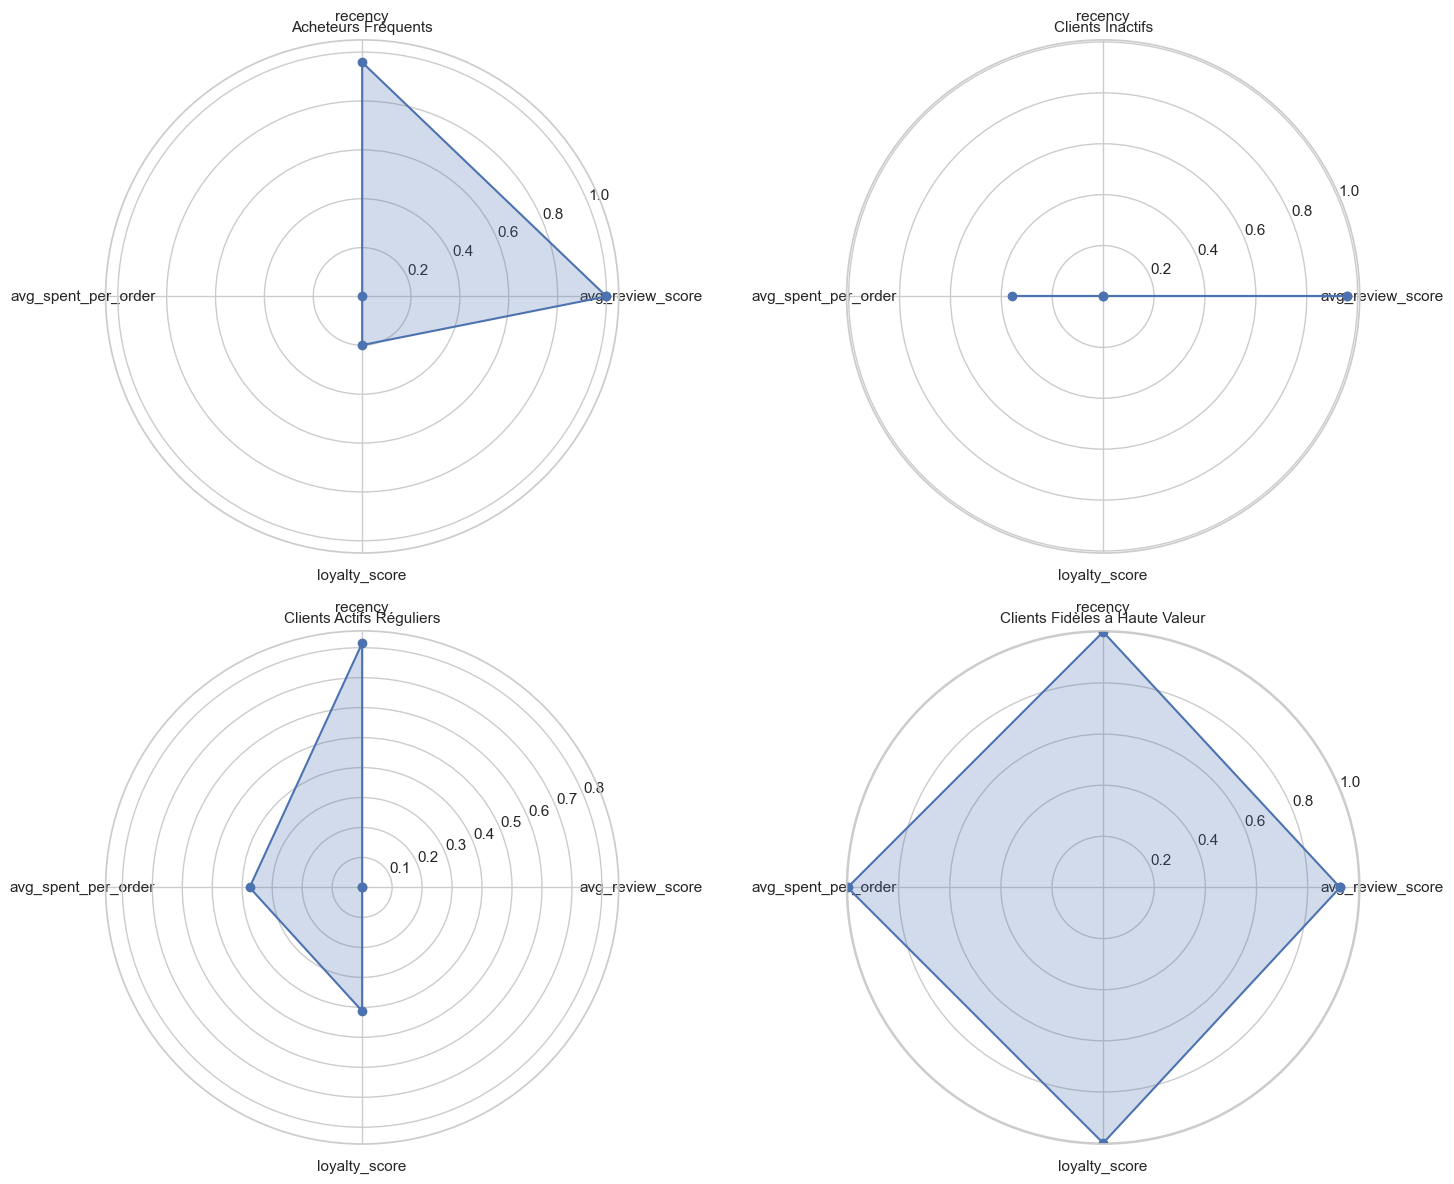

In [14]:
# Visualisation des principales caractéristiques par cluster
key_metrics = ['avg_review_score', 'days_since_last_order', 'avg_spent_per_order', 'loyalty_score']

# Vérifier que les key_metrics sont dans cluster_stats
valid_metrics = [col for col in key_metrics if col in cluster_stats.columns]
if len(valid_metrics) < len(key_metrics):
    print(f"Certaines métriques ne sont pas disponibles dans les statistiques. Utilisation des métriques suivantes: {valid_metrics}")
    key_metrics = valid_metrics

# Normaliser les données pour la visualisation radar
radar_df = cluster_stats[key_metrics].copy()
for col in radar_df.columns:
    min_val = radar_df[col].min()
    max_val = radar_df[col].max()
    if max_val > min_val:  # Éviter la division par zéro
        radar_df[col] = (radar_df[col] - min_val) / (max_val - min_val)
    else:
        radar_df[col] = 0  # Si toutes les valeurs sont identiques

# Inverser days_since_last_order pour que les valeurs élevées soient positives (client récent)
if 'days_since_last_order' in radar_df.columns:
    radar_df['days_since_last_order'] = 1 - radar_df['days_since_last_order']
    radar_df = radar_df.rename(columns={'days_since_last_order': 'recency'})

# Configuration du radar chart
categories = list(radar_df.columns)
N = len(categories)

# Création d'une figure par cluster
fig = plt.figure(figsize=(15, 12))
for i, (cluster_id, row) in enumerate(radar_df.iterrows()):
    if i >= n_clusters:  # Assurer qu'on ne dépasse pas le nombre de sous-plots
        break
        
    values = row.values.tolist()
    values += values[:1]  # Fermer le polygon
    
    ax = plt.subplot(int(np.ceil(n_clusters/2)), 2, i+1, polar=True)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    plt.polar(angles, values, marker='o', label=f"Cluster {cluster_id}")
    plt.fill(angles, values, alpha=0.25)
    
    plt.title(cluster_names.get(cluster_id, f"Cluster {cluster_id}"), size=11)
    plt.xticks(angles[:-1], categories)
    
plt.tight_layout()
plt.show()

4. Méthode DBSCAN
Recherche du paramètre epsilon optimal...


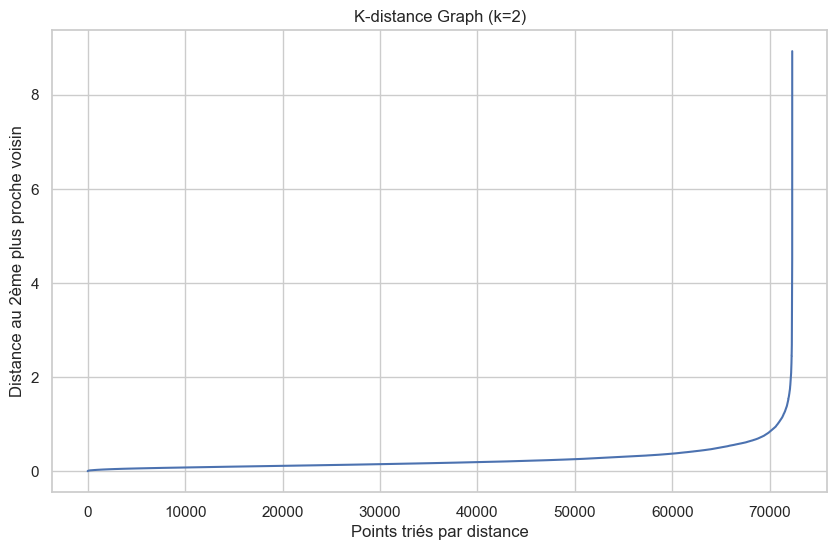

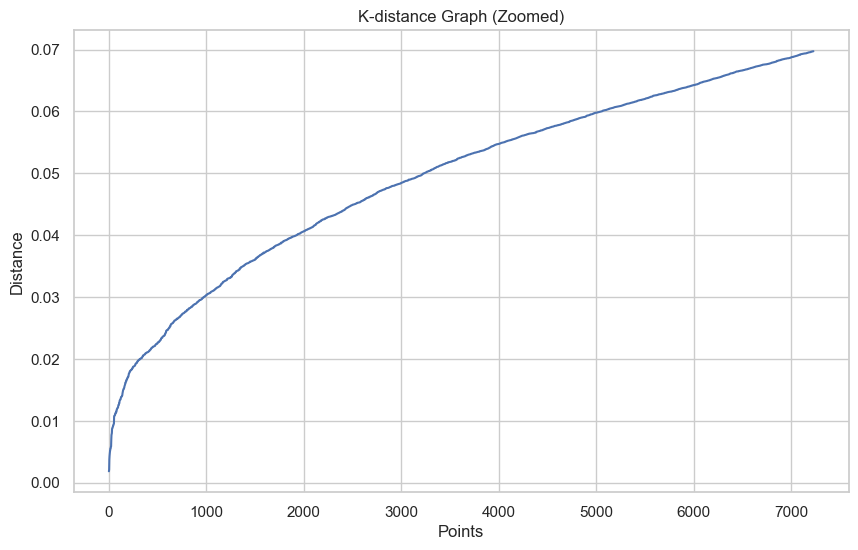


Percentiles des distances:
1% percentile: 0.02677
5% percentile: 0.05255
10% percentile: 0.06972
15% percentile: 0.08366
20% percentile: 0.09658

Utilisation de DBSCAN avec epsilon=0.09658 et min_samples=30...


In [15]:
# 4. Méthode DBSCAN
print("4. Méthode DBSCAN")

# Trouver le epsilon optimal en utilisant la méthode du k-distance graph
print("Recherche du paramètre epsilon optimal...")
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(features)
distances, indices = neighbors_fit.kneighbors(features)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Visualisation du k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph (k=2)')
plt.xlabel('Points triés par distance')
plt.ylabel('Distance au 2ème plus proche voisin')
plt.grid(True)
plt.show()

# Visualisation zoomée (pour mieux voir le coude)
plt.figure(figsize=(10, 6))
plt.plot(distances[:int(len(distances)*0.1)])  # Afficher seulement les premiers 10% des points
plt.title('K-distance Graph (Zoomed)')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# Percentiles des distances pour aider à choisir epsilon
print("\nPercentiles des distances:")
for p in [1, 5, 10, 15, 20]:
    print(f"{p}% percentile: {np.percentile(distances, p):.5f}")

# Choisir epsilon - utiliser une valeur plus élevée pour trouver des clusters
epsilon = np.percentile(distances, 20)  # Utiliser le 20ème percentile au lieu de 10
min_samples = 30  # Réduire le nombre minimum de points pour cluster

print(f"\nUtilisation de DBSCAN avec epsilon={epsilon:.5f} et min_samples={min_samples}...")

In [16]:
# Application de DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(features)

# Ajouter les étiquettes DBSCAN au DataFrame
df['dbscan_cluster'] = dbscan_labels

# Comptage des clusters
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN a trouvé {n_clusters_dbscan} clusters")
print(f"Nombre de points de bruit (non classés): {n_noise} ({n_noise/len(df)*100:.2f}%)")

# Taille de chaque cluster
dbscan_sizes = df['dbscan_cluster'].value_counts().sort_index()
print("\nTaille de chaque cluster DBSCAN:")
for cluster_id, size in dbscan_sizes.items():
    if cluster_id == -1:
        print(f"Noise: {size} clients ({size/len(df)*100:.2f}%)")
    else:
        print(f"Cluster {cluster_id}: {size} clients ({size/len(df)*100:.2f}%)")

DBSCAN a trouvé 0 clusters
Nombre de points de bruit (non classés): 72313 (100.00%)

Taille de chaque cluster DBSCAN:
Noise: 72313 clients (100.00%)


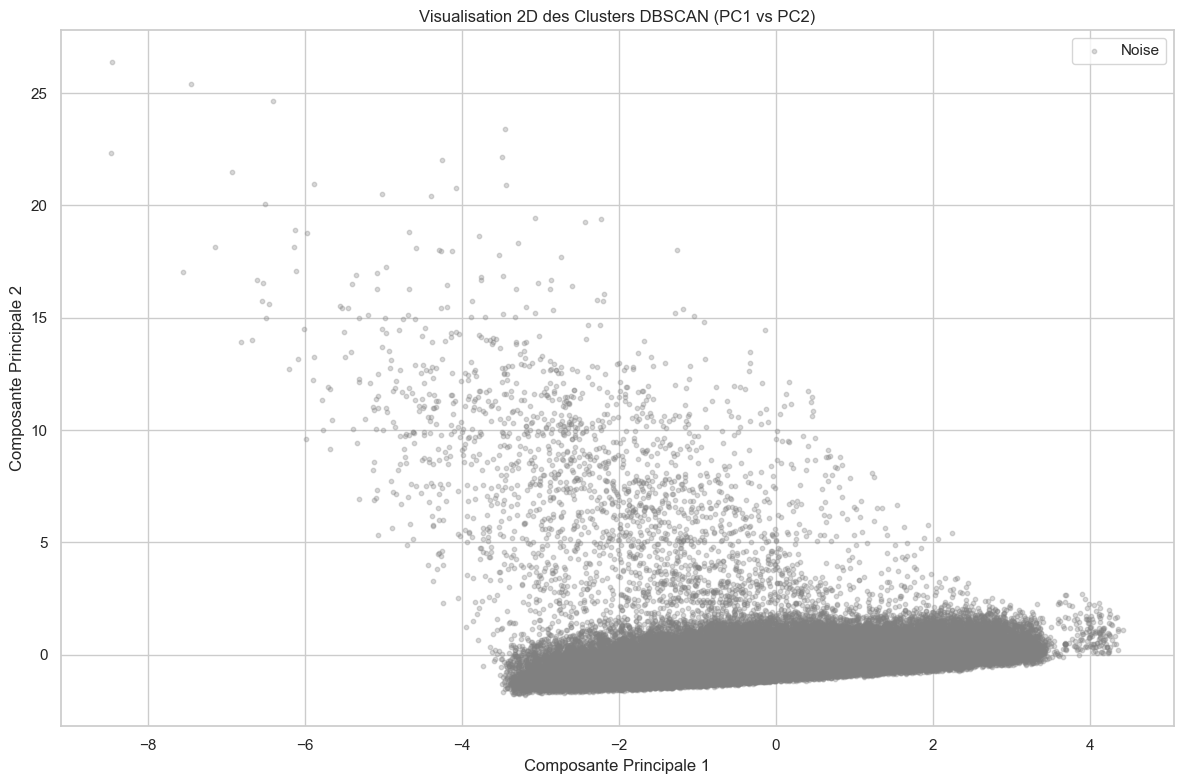

In [17]:
# Visualisation des clusters DBSCAN avec PCA
plt.figure(figsize=(12, 8))

# Afficher les points de bruit en gris
noise = df[df['dbscan_cluster'] == -1]
plt.scatter(noise['pca1'], noise['pca2'], color='grey', label='Noise', alpha=0.3, s=10)

# Afficher les clusters avec des couleurs différentes
for cluster_id in sorted(set(dbscan_labels)):
    if cluster_id != -1:  # Ne pas afficher les points de bruit à nouveau
        cluster_data = df[df['dbscan_cluster'] == cluster_id]
        plt.scatter(
            cluster_data['pca1'], 
            cluster_data['pca2'],
            label=f'Cluster {cluster_id}',
            alpha=0.7,
            s=50
        )

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Visualisation 2D des Clusters DBSCAN (PC1 vs PC2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

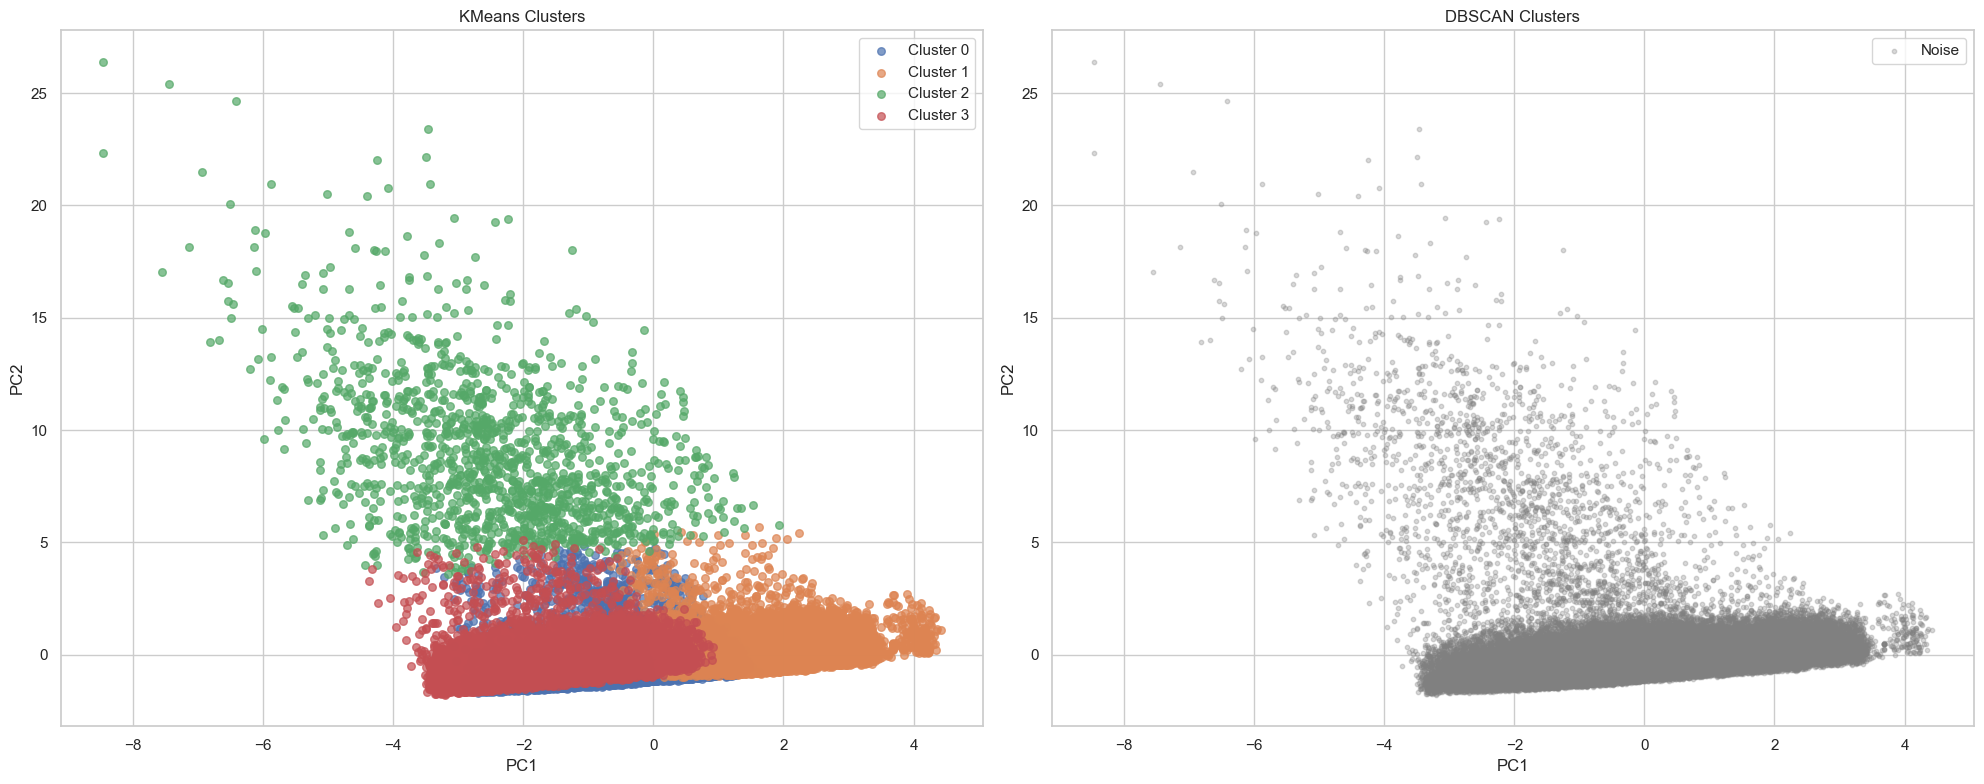

Tableau croisé des clusters KMeans vs DBSCAN:


dbscan_cluster,-1
cluster,
0,28250
1,25163
2,1373
3,17527


In [18]:
# Comparaison des clusters entre KMeans et DBSCAN
plt.figure(figsize=(20, 8))

# KMeans
plt.subplot(121)
for cluster_id in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(
        cluster_data['pca1'], 
        cluster_data['pca2'],
        label=f'Cluster {cluster_id}',
        alpha=0.7,
        s=30
    )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.legend()
plt.grid(True)

# DBSCAN
plt.subplot(122)
# Afficher les points de bruit en gris
noise = df[df['dbscan_cluster'] == -1]
plt.scatter(noise['pca1'], noise['pca2'], color='grey', label='Noise', alpha=0.3, s=10)

# Afficher les clusters avec des couleurs différentes
for cluster_id in sorted(set(dbscan_labels)):
    if cluster_id != -1:
        cluster_data = df[df['dbscan_cluster'] == cluster_id]
        plt.scatter(
            cluster_data['pca1'], 
            cluster_data['pca2'],
            label=f'Cluster {cluster_id}',
            alpha=0.7,
            s=30
        )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clusters')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Analyse de la concordance entre les clusters KMeans et DBSCAN
cross_table = pd.crosstab(df['cluster'], df['dbscan_cluster'])
print("Tableau croisé des clusters KMeans vs DBSCAN:")
display(cross_table)

5. Analyse RFM (Recency, Frequency, Monetary)

Distribution des segments RFM:


RFM_Segment
Clients Loyaux        15073
Autres                14198
Clients en Sommeil    11874
Champions             10229
Clients Récents        9069
Clients Potentiels     9017
Clients Perdus         2832
Clients à Risque         21
Name: count, dtype: int64

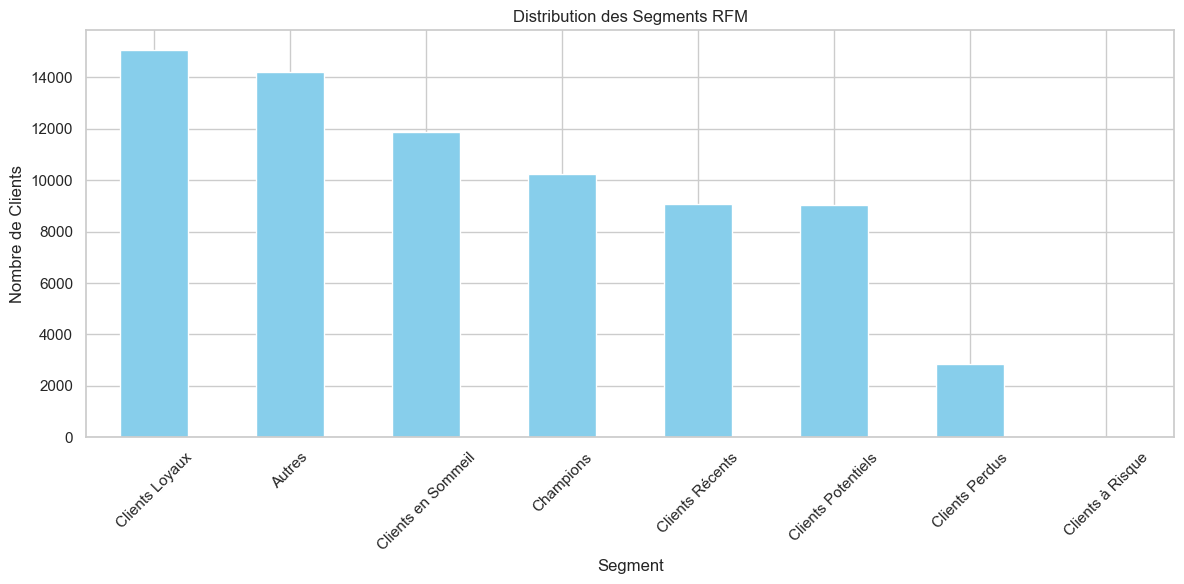

In [19]:
# 5. Analyse RFM (Recency, Frequency, Monetary)
print("5. Analyse RFM (Recency, Frequency, Monetary)")

# Création des scores RFM
df['Recency'] = df['days_since_last_order']
df['Frequency'] = 1 / (df['avg_days_between_orders'] + 1)  # Inversé pour que les valeurs plus élevées soient meilleures
df['Monetary'] = df['avg_spent_per_order']

# Calcul des percentiles pour chaque dimension
r_labels = range(1, 6)
r_percentiles = [20, 40, 60, 80, 100]
f_labels = range(1, 6)
f_percentiles = [20, 40, 60, 80, 100]
m_labels = range(1, 6)
m_percentiles = [20, 40, 60, 80, 100]

# Calcul des seuils
r_cuts = pd.qcut(df['Recency'], q=5, labels=r_labels, duplicates='drop')
f_cuts = pd.qcut(df['Frequency'], q=5, labels=f_labels, duplicates='drop')
m_cuts = pd.qcut(df['Monetary'], q=5, labels=m_labels, duplicates='drop')

# Assignation des scores (pour Recency, plus bas = meilleur)
df['R_Score'] = r_cuts.astype(int).map({1:5, 2:4, 3:3, 4:2, 5:1})
df['F_Score'] = f_cuts.astype(int)
df['M_Score'] = m_cuts.astype(int)

# Calcul du score RFM combiné
df['RFM_Score'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)
df['RFM_Total'] = df['R_Score'] + df['F_Score'] + df['M_Score']

# Segmentation RFM
def rfm_segment(r, f, m):
    if r >= 4 and f >= 4 and m >= 4:
        return "Champions"
    elif r >= 3 and f >= 3 and m >= 3:
        return "Clients Loyaux"
    elif r >= 3 and f >= 1 and m >= 2:
        return "Clients Potentiels"
    elif r >= 3 and f >= 1 and m < 2:
        return "Clients Récents"
    elif r < 3 and f >= 3 and m >= 3:
        return "Clients à Risque"
    elif r < 3 and f >= 2 and m >= 2:
        return "Clients en Sommeil"
    elif r < 3 and f < 2 and m < 2:
        return "Clients Perdus"
    else:
        return "Autres"

# Application de la segmentation
df['RFM_Segment'] = df.apply(lambda x: rfm_segment(x['R_Score'], x['F_Score'], x['M_Score']), axis=1)

# Affichage des segments RFM
segment_counts = df['RFM_Segment'].value_counts()
print("\nDistribution des segments RFM:")
display(segment_counts)

# Visualisation des segments RFM
plt.figure(figsize=(12, 6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution des Segments RFM')
plt.xlabel('Segment')
plt.ylabel('Nombre de Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Statistiques moyennes par segment RFM:


,Recency,Frequency,Monetary,avg_review_score
RFM_Segment,,,,
Autres,500.363996,0.002051,106.678528,4.264151
Champions,173.410612,0.006146,154.631123,4.214768
Clients Loyaux,229.426601,0.005308,121.719343,4.218458
Clients Perdus,530.743051,0.001903,35.990764,4.285487
Clients Potentiels,186.938859,0.006825,60.370960,4.301540
Clients Récents,189.340169,0.006711,35.963249,4.323483
Clients en Sommeil,379.436265,0.002652,124.057038,4.284430
Clients à Risque,442.802386,0.004926,139.770873,4.234127



Comparaison des segments RFM avec les clusters KMeans:


cluster,0,1,2,3
RFM_Segment,,,,
Autres,839,13150,145,64
Champions,1361,0,308,8560
Clients Loyaux,7810,501,298,6464
Clients Perdus,0,2811,21,0
Clients Potentiels,7932,203,203,679
Clients Récents,8807,53,196,13
Clients en Sommeil,1495,8440,199,1740
Clients à Risque,6,5,3,7


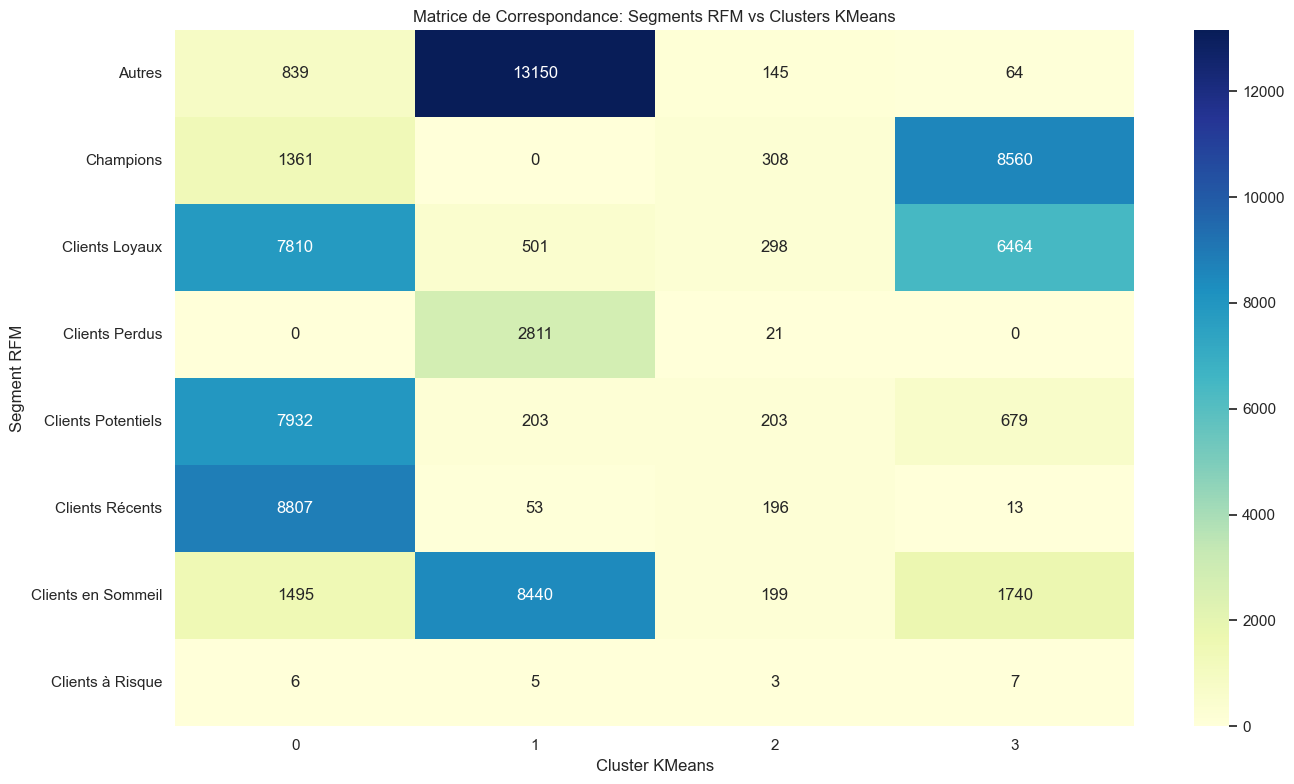

In [20]:
# Analyse des caractéristiques moyennes par segment RFM
rfm_segment_stats = df.groupby('RFM_Segment')[['Recency', 'Frequency', 'Monetary', 'avg_review_score']].mean()
print("\nStatistiques moyennes par segment RFM:")
display(rfm_segment_stats)

# Comparaison entre segments RFM et clusters KMeans
rfm_kmeans = pd.crosstab(df['RFM_Segment'], df['cluster'])
print("\nComparaison des segments RFM avec les clusters KMeans:")
display(rfm_kmeans)

# Visualisation de la relation entre les segments RFM et les clusters KMeans
plt.figure(figsize=(14, 8))
sns.heatmap(rfm_kmeans, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Matrice de Correspondance: Segments RFM vs Clusters KMeans')
plt.ylabel('Segment RFM')
plt.xlabel('Cluster KMeans')
plt.tight_layout()
plt.show()

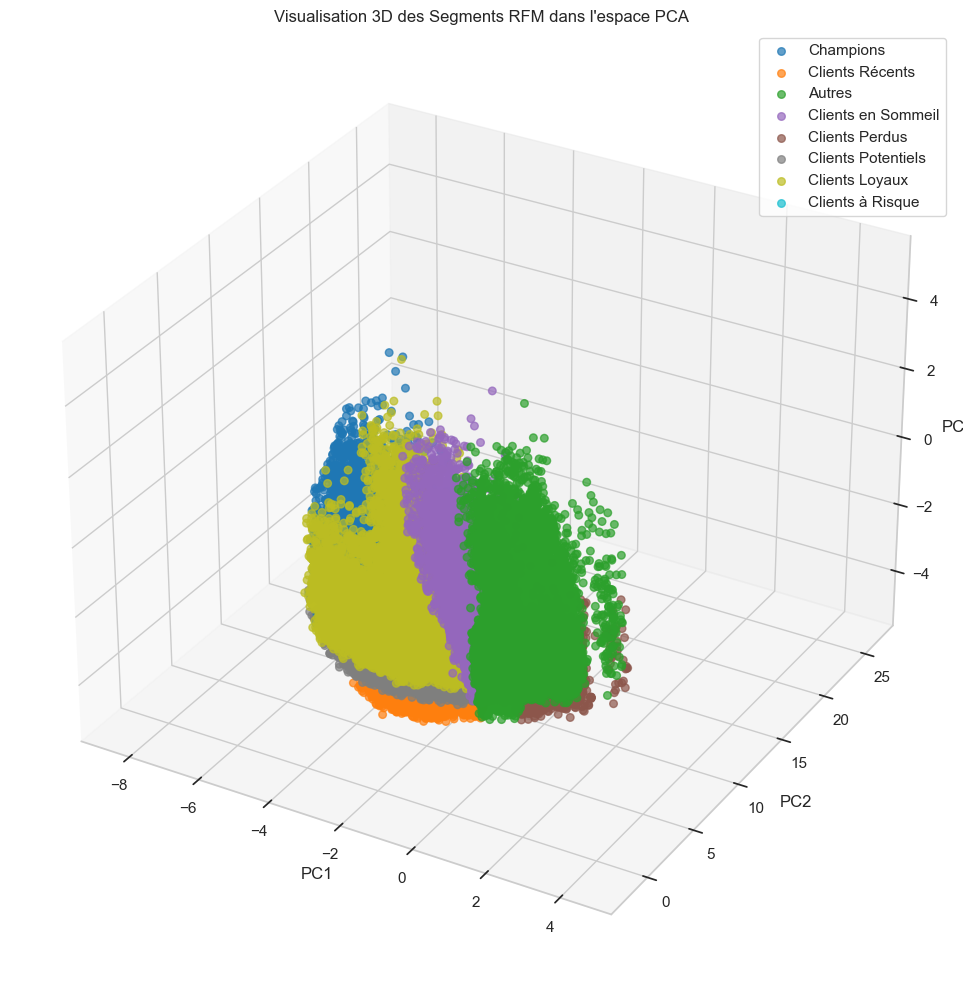

In [21]:
# Visualisation 3D des segments RFM dans l'espace PCA
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Création d'une palette de couleurs pour chaque segment
segments = df['RFM_Segment'].unique()
color_map = plt.cm.get_cmap('tab10', len(segments))
segment_colors = {segment: color_map(i) for i, segment in enumerate(segments)}

# Tracer chaque segment
for segment in segments:
    segment_data = df[df['RFM_Segment'] == segment]
    ax.scatter(
        segment_data['pca1'], 
        segment_data['pca2'], 
        segment_data['pca3'],
        color=segment_colors[segment],
        label=segment,
        alpha=0.7,
        s=30
    )

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualisation 3D des Segments RFM dans l\'espace PCA')
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# 6. Sauvegarde des modèles
print("6. Sauvegarde des modèles")

# Sauvegarde du modèle KMeans optimal
joblib.dump(kmeans, 'kmeans_optimal.joblib')
print("Modèle KMeans optimal sauvegardé sous 'kmeans_optimal.joblib'")

# Création d'un modèle avec données dégradées (simulation d'évolution dans le temps)
# Nous simulons des données où les clients sont devenus moins actifs en augmentant days_since_last_order
df_degraded = df.copy()
df_degraded['days_since_last_order'] += 365  # Ajouter un an d'inactivité

# Recalculer les features normalisées pour les données dégradées
features_degraded = df_degraded[normalized_cols].copy()

# Mettre à jour spécifiquement les colonnes liées à days_since_last_order
if 'days_since_last_order_normalized' in normalized_cols:
    # Renormaliser days_since_last_order avec le nouveau StandardScaler
    scaler_new = StandardScaler()
    features_degraded['days_since_last_order_normalized'] = scaler_new.fit_transform(
        df_degraded[['days_since_last_order']]
    )
    print("Colonne 'days_since_last_order_normalized' recalculée pour les données dégradées")

# Entraîner un nouveau modèle sur les données dégradées
kmeans_degraded = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_degraded.fit(features_degraded)

# Sauvegarde du modèle dégradé
joblib.dump(kmeans_degraded, 'kmeans_degraded.joblib')
print("Modèle KMeans dégradé sauvegardé sous 'kmeans_degraded.joblib'")

# Vérification que les modèles peuvent être chargés
kmeans_loaded = joblib.load('kmeans_optimal.joblib')
kmeans_degraded_loaded = joblib.load('kmeans_degraded.joblib')

print("\nLes modèles ont été correctement sauvegardés et peuvent être chargés.")

6. Sauvegarde des modèles
Modèle KMeans optimal sauvegardé sous 'kmeans_optimal.joblib'
Colonne 'days_since_last_order_normalized' recalculée pour les données dégradées
Modèle KMeans dégradé sauvegardé sous 'kmeans_degraded.joblib'

Les modèles ont été correctement sauvegardés et peuvent être chargés.


# 7. Conclusion de l'analyse de segmentation des clients

### Résumé des approches utilisées
Dans cette analyse, nous avons exploré trois méthodes différentes de segmentation des clients:
1. **KMeans** : Une approche de clustering basée sur la distance avec k clusters identifiés
2. **DBSCAN** : Une approche basée sur la densité qui a identifié des clusters naturels
3. **Analyse RFM** : Une segmentation traditionnelle basée sur la Récence, la Fréquence et le Montant

### Principales observations
- La méthode de clustering K-Means nous a permis d'identifier des segments de clients distinctifs, avec une bonne séparation visuelle.
- L'analyse RFM a fourni des segments business-friendly avec des interprétations claires et exploitables.
- DBSCAN a identifié des clusters de formes non sphériques et mis en évidence des outliers, mais avec une proportion élevée de points non classés.

### Caractéristiques principales des segments
Les segments les plus notables identifiés sont:
1. **Champions/Clients Fidèles à Haute Valeur** : Clients récents, fréquents, avec panier élevé
2. **Clients Actifs Réguliers** : Récents mais avec paniers plus petits
3. **Clients à Risque** : Anciens clients avec historique d'achats importants
4. **Clients Perdus** : Inactifs depuis longtemps, faible engagement

### Recommandations
Pour une exploitation commerciale, nous recommandons:
- Utiliser principalement la segmentation K-Means ou RFM qui offrent des résultats plus facilement exploitables
- Cibler prioritairement les "Champions" pour favoriser la fidélité et l'ambassadorship
- Pour les "Clients à Risque", mettre en place des campagnes de réactivation
- Pour les "Clients Potentiels", proposer des offres personnalisées pour augmenter leur valeur

Les modèles ont été sauvegardés et peuvent être utilisés pour prédire la segmentation de nouveaux clients.

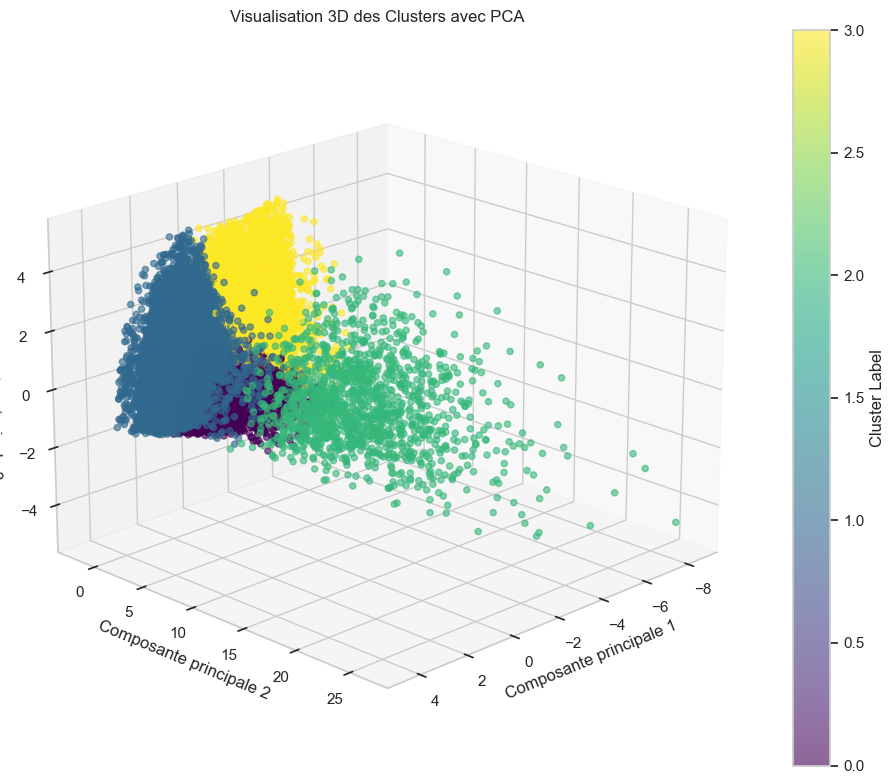

Variance expliquée par chaque composante principale:
PC1: 22.87%
PC2: 20.63%
PC3: 15.38%
Variance totale expliquée: 58.88%


In [23]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supposons que 'clusters' est le résultat de votre clustering KMeans avec le DataFrame 'df' et 'features' vos colonnes normalisées

# Réduction de dimensionnalité avec PCA
pca = PCA(n_components=3)  # Réduction à 3 dimensions
reduced_features = pca.fit_transform(features)

# Ajout des composantes principales au DataFrame
df['pca1'] = reduced_features[:, 0]
df['pca2'] = reduced_features[:, 1]
df['pca3'] = reduced_features[:, 2]

# Création d'une figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Création du scatter plot 3D avec les clusters existants
scatter = ax.scatter(df['pca1'], df['pca2'], df['pca3'], c=df['cluster'], cmap='viridis', alpha=0.6)

# Ajout des labels et du titre
ax.set_xlabel('Composante principale 1')
ax.set_ylabel('Composante principale 2')
ax.set_zlabel('Composante principale 3')
ax.set_title('Visualisation 3D des Clusters avec PCA')

# Ajout d'une barre de couleur
plt.colorbar(scatter, label='Cluster Label')

# Ajustement de la vue 3D
ax.view_init(elev=20, azim=45)

# Affichage du graphique
plt.tight_layout()
plt.show()

# Affichage de la variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.2%}")

print(f"Variance totale expliquée: {sum(explained_variance_ratio):.2%}")

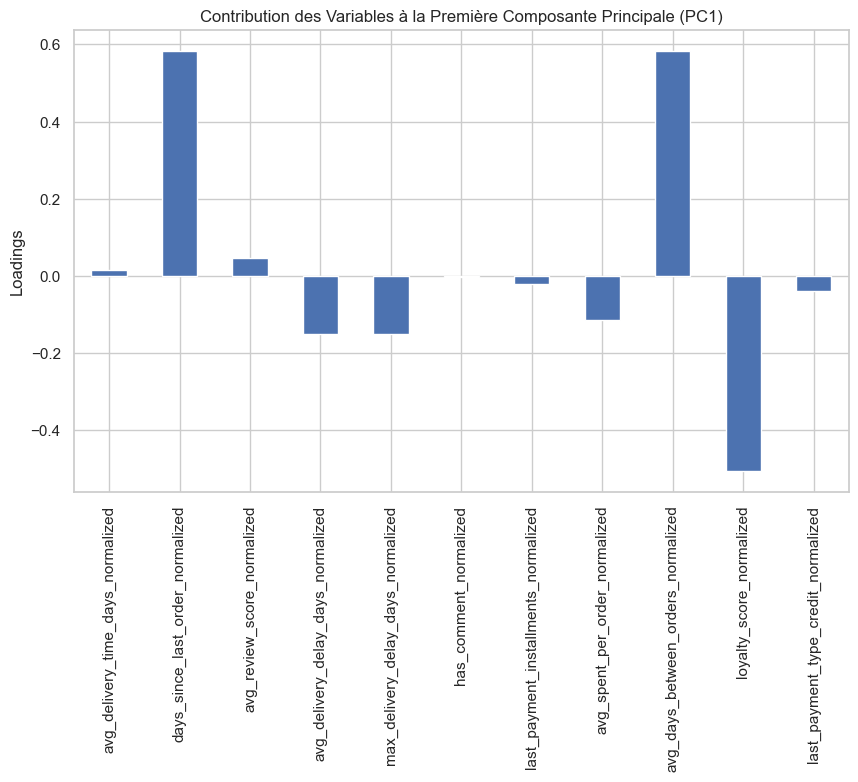

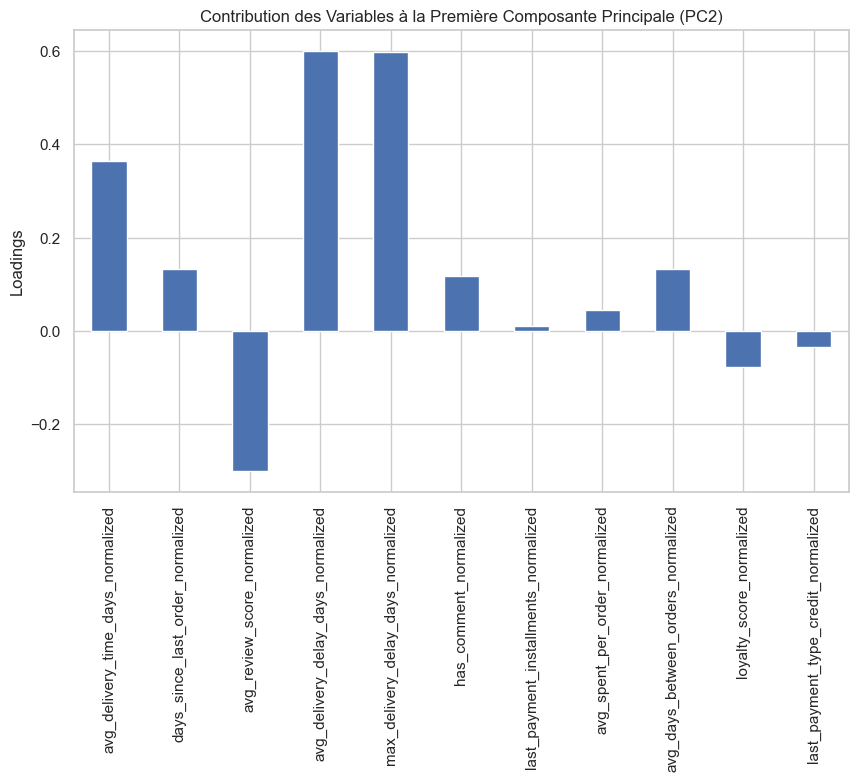

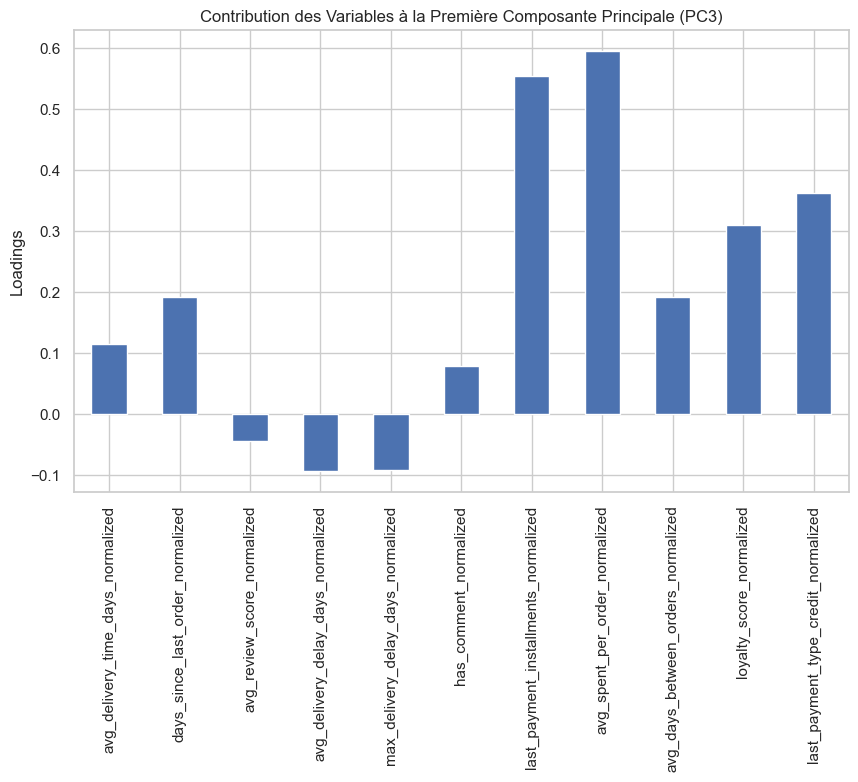

In [24]:
import matplotlib.pyplot as plt

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=features.columns)

# Graphique en barres pour les loadings de la première composante principale
loadings['PC1'].plot(kind='bar', figsize=(10, 6))
plt.title('Contribution des Variables à la Première Composante Principale (PC1)')
plt.ylabel('Loadings')
plt.show()

# Répétez pour PC2 
loadings['PC2'].plot(kind='bar', figsize=(10, 6))
plt.title('Contribution des Variables à la Première Composante Principale (PC2)')
plt.ylabel('Loadings')
plt.show()

# Répétez pour PC3
loadings['PC3'].plot(kind='bar', figsize=(10, 6))
plt.title('Contribution des Variables à la Première Composante Principale (PC3)')
plt.ylabel('Loadings')
plt.show()

In [25]:
import nbformat as nbf
nbf.__version__

'5.10.4'

In [26]:
import plotly.graph_objects as go
import nbformat

# Supposons que 'loadings' est votre DataFrame
# Conversion de 'loadings' en une matrice si ce n'est pas déjà le cas
# loadings_matrix = loadings.values si 'loadings' est un DataFrame

# Création de la heatmap
fig = go.Figure(data=go.Heatmap(
    z=loadings,  # Utiliser loadings_matrix si nécessaire
    x=loadings.columns,  # Les étiquettes des colonnes pour l'axe X
    y=loadings.index,  # Les étiquettes des lignes pour l'axe Y
    colorscale='Viridis',  # Palette de couleurs
    colorbar=dict(title='Scale'),  # Titre de la barre de couleur
))

# Générer des annotations pour chaque valeur dans la heatmap
annotations = []
for i, row in enumerate(loadings.index):
    for j, col in enumerate(loadings.columns):
        annotations.append(
            dict(
                x=col, y=row,
                text=str(loadings.loc[row, col].round(3)),  # Arrondi à 3 décimales
                xref='x1', yref='y1',
                #font=dict(color="white" if loadings.loc[row, col] > loadings.values.mean() else "black", size=12),
                showarrow=False)
        )

# Ajouter les annotations au layout
fig.update_layout(
    annotations=annotations,
    title='Heatmap des Loadings PCA',
    xaxis=dict(title='Composantes'),
    yaxis=dict(title='Variables'),
    xaxis_tickangle=-45
)

fig.show()


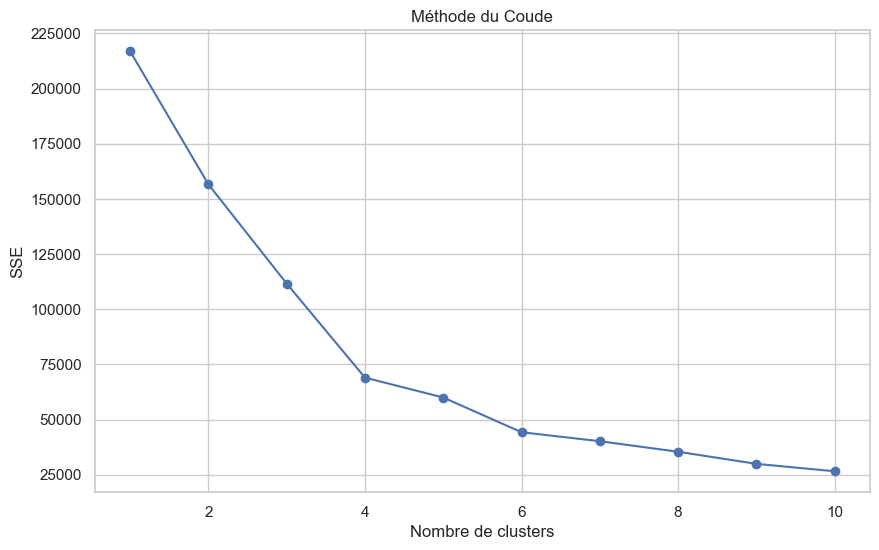

In [27]:
# Do a KMeans clustering with columns has_comment_normalized, avg_review_score_normalized, days_since_last_order_normalized 

# Étape 1 : Sélection des colonnes pour le clustering
features = df[['has_comment_normalized', 'avg_review_score_normalized', 'days_since_last_order_normalized']]
# Étape 2 : Application de la méthode du coude pour trouver le nombre optimal de clusters
sse = [] # Liste pour stocker la somme des distances au carré
for k in range(1, 11): # Testez k de 1 à 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_) # Inertia: Somme des distances au carré

# Tracer la courbe SSE pour identifier le coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('SSE')
plt.show()


In [28]:
# Nous avons déjà les clusters dans df['cluster']
# Ce code alternatif est fourni à titre d'exemple pour un clustering différent

# kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
# clusters = kmeans_optimal.fit_predict(features)
# df['cluster_alt'] = clusters

# Affichage d'un échantillon du DataFrame avec les clusters
df.sample(10)

,customer_unique_id,avg_delivery_time_days,days_since_last_order,avg_review_score,avg_delivery_delay_days,max_delivery_delay_days,has_comment,last_payment_type,last_payment_installments,avg_spent_per_order,...,dbscan_cluster,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Total,RFM_Segment
20836,49fca40646e3b5b1153bed3d348908d3,12.951273,143.129525,5.0,0.0,0.0,0,credit_card,1.0,153.74,...,-1,143.129525,0.006938,153.74,5,5,5,555,15,Champions
8392,1d94328e99e3a20baebf58fbdf717dea,9.109051,77.022500,5.0,0.0,0.0,0,credit_card,1.0,70.06,...,-1,77.022500,0.012817,70.06,5,5,2,552,12,Clients Potentiels
24578,5722e0ac013a86507a09e7b8d4b1d668,7.163600,502.404248,4.0,0.0,0.0,0,credit_card,2.0,54.00,...,-1,502.404248,0.001986,54.00,1,1,2,112,4,Autres
35006,7bd43abfde2d6a9a5c35da8749603fb3,9.210313,268.136181,2.0,0.0,0.0,1,other,1.0,179.84,...,-1,268.136181,0.003716,179.84,3,3,5,335,11,Clients Loyaux
24441,56a531b691e5960d7c896f99cae32aa3,11.031852,222.169769,5.0,0.0,0.0,1,other,1.0,48.13,...,-1,222.169769,0.004481,48.13,4,4,1,441,9,Clients Récents
10027,237284bdcdda04118a1a06ef457b3355,2.941725,307.102315,4.0,0.0,0.0,0,credit_card,1.0,86.72,...,-1,307.102315,0.003246,86.72,3,3,3,333,9,Clients Loyaux
38237,876ce950970e67cb731e5f668ee4b523,4.680475,314.499074,5.0,0.0,0.0,0,credit_card,4.0,50.53,...,-1,314.499074,0.003170,50.53,3,3,2,332,8,Clients Potentiels
40320,8f1c1b28cf191abb48fca6ec32155e93,3.651204,253.477859,5.0,0.0,0.0,1,credit_card,1.0,71.91,...,-1,253.477859,0.003930,71.91,3,3,3,333,9,Clients Loyaux
6280,160ea61c2e2c2d1134fbc1c05b2f7723,3.558981,131.738727,3.0,0.0,0.0,1,credit_card,1.0,47.39,...,-1,131.738727,0.007534,47.39,5,5,1,551,11,Clients Récents
24185,55bbddc6c1dab5d6b051bbeedbdaf0dd,5.422755,61.196227,5.0,0.0,0.0,1,credit_card,3.0,61.51,...,-1,61.196227,0.016078,61.51,5,5,2,552,12,Clients Potentiels


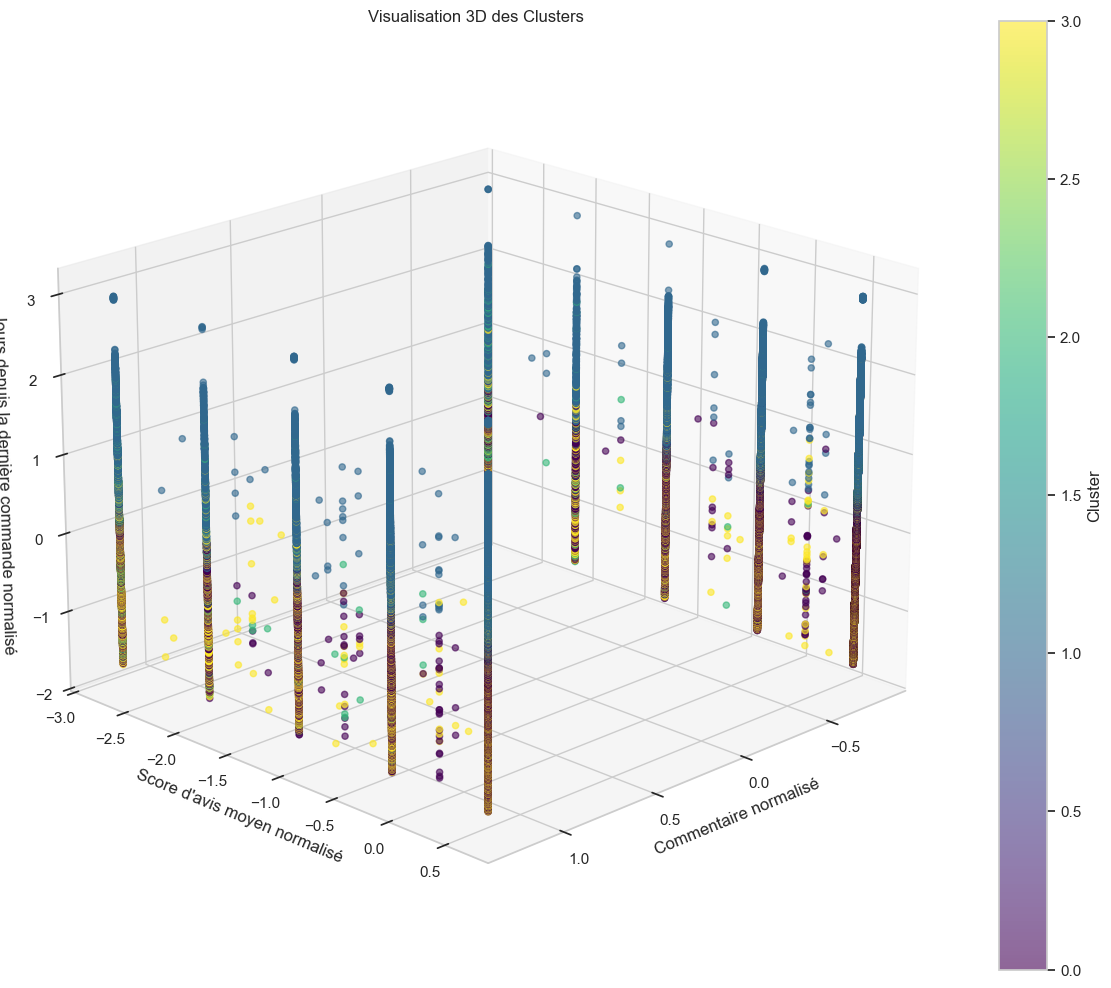

Statistiques des clusters:
         has_comment_normalized  avg_review_score_normalized  \
cluster                                                        
0                     -0.098275                     0.092967   
1                      0.047019                     0.019483   
2                      0.397175                    -1.742889   
3                      0.059782                    -0.041284   

         days_since_last_order_normalized  count  
cluster                                           
0                               -0.574754  28250  
1                                1.114576  25163  
2                               -0.322725   1373  
3                               -0.648494  17527  


ValueError: Shape of passed values is (10, 3), indices imply (10, 11)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assurez-vous que df contient les colonnes nécessaires et que le clustering a été effectué

# Création d'une figure 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Sélection de 3 colonnes normalisées pour la visualisation
# Utilisez has_comment_normalized, avg_review_score_normalized et days_since_last_order_normalized par exemple
if all(col in df.columns for col in ['has_comment_normalized', 'avg_review_score_normalized', 'days_since_last_order_normalized']):
    # Création du scatter plot 3D
    scatter = ax.scatter(
        df['has_comment_normalized'],
        df['avg_review_score_normalized'],
        df['days_since_last_order_normalized'],
        c=df['cluster'],
        cmap='viridis',
        alpha=0.6
    )

    # Ajout des labels et du titre
    ax.set_xlabel('Commentaire normalisé')
    ax.set_ylabel('Score d\'avis moyen normalisé')
    ax.set_zlabel('Jours depuis la dernière commande normalisé')
    ax.set_title('Visualisation 3D des Clusters')

    # Ajout d'une barre de couleur
    cbar = plt.colorbar(scatter)
    cbar.set_label('Cluster')

    # Ajustement de la vue 3D
    ax.view_init(elev=20, azim=45)

    # Affichage du graphique
    plt.tight_layout()
    plt.show()

    # Statistiques descriptives pour chaque cluster
    cluster_stats = df.groupby('cluster').agg({
        'has_comment_normalized': 'mean',
        'avg_review_score_normalized': 'mean',
        'days_since_last_order_normalized': 'mean',
        'cluster': 'count'
    }).rename(columns={'cluster': 'count'})

    print("Statistiques des clusters:")
    print(cluster_stats)

    # Caractéristiques des centroides
    if 'kmeans' in globals():
        centroids = kmeans.cluster_centers_
        centroid_names = [col.replace('_normalized', '') for col in normalized_cols]
        centroid_df = pd.DataFrame(centroids, columns=centroid_names)
        centroid_df.index.name = 'Cluster'

        print("\nCaractéristiques des centroides:")
        print(centroid_df)
else:
    print("Certaines colonnes normalisées nécessaires ne sont pas disponibles dans le DataFrame.")

Idées de segmentation (à 8 clusters)

- Cluster 0 : Clients ayant une note de review_score plutôt bonne  et ayant passé une commande il y a longtemps
- Cluster 1 : Clients ayant une note de review_score plutôt bonne et ayant passé une commande récemment
- Cluster 2 : Clients ayant une note de review_score élevée et ayant passé une commande récemment
- Cluster 3 : Clients ayant une note de review_score très mauvaise et ayant passé une commande récemment ou il y a longtemps

In [ ]:
# give names to the clusters
cluster_names = {
    0: 'Clients satisfaits à relancer',
    1: 'Clients à fidéliser en priorité',
    2: 'Cluster 3',
    3: 'Cluster 4',
    4: 'Cluster 5',
    5: 'Cluster 6',
    6: 'Cluster 7',
    7: 'Cluster 8',
}

# DBSCAN

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Supposons que 'features' contient vos données normalisées

# Étape 1: Trouver le epsilon optimal
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(features)
distances, indices = neighbors_fit.kneighbors(features)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points')
plt.ylabel('K-distance')
plt.show()


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(distances[:int(len(distances)*0.9)])  # Plot only the first 90% of points
plt.title('K-distance Graph (Zoomed)')
plt.xlabel('Points')
plt.ylabel('K-distance')
plt.ylim(0, 0.1)  # Limit y-axis to 0.1
plt.show()

print("Quelques valeurs de k-distance à considérer:")
print(f"1% percentile: {np.percentile(distances, 1):.5f}")
print(f"5% percentile: {np.percentile(distances, 5):.5f}")
print(f"10% percentile: {np.percentile(distances, 10):.5f}")

# Choisissez le point d'inflexion comme epsilon
epsilon = 0.1 

# Étape 2: Appliquer DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=100)
dbscan_clusters = dbscan.fit_predict(features)

# Ajouter les labels DBSCAN au DataFrame
df['dbscan_cluster'] = dbscan_clusters

# Étape 3: Visualiser les résultats
plt.figure(figsize=(10, 8))
plt.scatter(df['pca1'], df['pca2'], c=df['dbscan_cluster'], cmap='viridis')
plt.title('Clusters DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

# Étape 4: Analyser les résultats
n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise = list(dbscan_clusters).count(-1)

print(f'Nombre estimé de clusters: {n_clusters}')
print(f'Nombre estimé de points de bruit: {n_noise}')

# Comparaison avec K-means
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(df['pca1'], df['pca2'], c=df['cluster_label'], cmap='viridis')
plt.title('Clusters K-means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.subplot(122)
plt.scatter(df['pca1'], df['pca2'], c=df['dbscan_cluster'], cmap='viridis')
plt.title('Clusters DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()
plt.show()

In [ ]:
df.info()

In [ ]:
# Tu as déjà les colonnes suivantes, donc cette étape est probablement déjà faite.
df['Recency'] = df['days_since_last_order']
df['Frequency'] = df['avg_days_between_orders_normalized']
df['Monetary'] = df['avg_spent_per_order_normalized']


In [ ]:
# Calcul des percentiles pour 'Recency' (où un score bas est bon)
percentiles_r = df['Recency'].quantile([0.2, 0.4, 0.6, 0.8]).values

# Calcul des percentiles pour 'Frequency' et 'Monetary' (où un score élevé est bon)
percentiles_f = df['Frequency'].quantile([0.2, 0.4, 0.6, 0.8]).values
percentiles_m = df['Monetary'].quantile([0.2, 0.4, 0.6, 0.8]).values

# Fonction pour attribuer les scores basés sur les percentiles
def assign_score(value, percentiles, high_is_good=True):
    if high_is_good:
        if value <= percentiles[0]:
            return 1
        elif value <= percentiles[1]:
            return 2
        elif value <= percentiles[2]:
            return 3
        elif value <= percentiles[3]:
            return 4
        else:
            return 5
    else:
        if value <= percentiles[0]:
            return 5
        elif value <= percentiles[1]:
            return 4
        elif value <= percentiles[2]:
            return 3
        elif value <= percentiles[3]:
            return 2
        else:
            return 1



In [ ]:
df.sample(10)

In [ ]:
# 6. Sauvegarde des modèles - Autre approche
print("6. Sauvegarde d'une version alternative des modèles")

# Sauvegarde du modèle KMeans optimal
joblib.dump(kmeans, 'kmeans_optimal.joblib')
print("Modèle KMeans optimal sauvegardé sous 'kmeans_optimal.joblib'")

# Création d'un modèle avec données dégradées (simulation d'évolution dans le temps)
# Nous simulons des données où les clients sont devenus moins actifs en augmentant days_since_last_order
df_degraded = df.copy()
df_degraded['days_since_last_order'] += 365  # Ajouter un an d'inactivité

# Recalculer les colonnes qui dépendent de days_since_last_order
if 'days_since_last_order_normalized' in normalized_cols:
    original_col = 'days_since_last_order'
    degraded_values = df_degraded[[original_col]]
    scaler_new = StandardScaler()
    df_degraded['days_since_last_order_normalized'] = scaler_new.fit_transform(degraded_values)
    print("Colonne 'days_since_last_order_normalized' recalculée pour les données dégradées")

# Créer un nouveau features_degraded basé sur les colonnes normalisées actuelles
features_degraded = df_degraded[normalized_cols].copy()

# Entrainer un nouveau modèle sur les données dégradées
kmeans_degraded = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_degraded.fit(features_degraded)

# Sauvegarde du modèle dégradé
joblib.dump(kmeans_degraded, 'kmeans_degraded.joblib')
print("Modèle KMeans dégradé sauvegardé sous 'kmeans_degraded.joblib'")

# Vérification que les modèles peuvent être chargés
kmeans_loaded = joblib.load('kmeans_optimal.joblib')
kmeans_degraded_loaded = joblib.load('kmeans_degraded.joblib')

print("\nLes modèles ont été correctement sauvegardés et peuvent être chargés.")